# Assignment 3

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

from scipy.optimize import curve_fit

In [3]:
from itertools import product

### Loading the data

Let's start by loading the **time series**. The file `curves_raw.npy` is in a `numpy` compressed format, which means that we'll use `np.load` to read it :

In [4]:
data = np.load("curves_raw.npy")
#using nmupy to download 
n_plates, n_rows, n_columns, n_points = data.shape

In [5]:
#the shape of the data :
data.shape



(4, 32, 48, 218)

The variable `data` now contains the time series as an `np.array`. It has 4 dimensions, which depict :
1. the plate number
2. the row number
3. the column number
4. the time point

### Transforming into a `pd.DataFrame`

This version of the data is very compact, but **not easily readable**. Let's turn it into a `pd.DataFrame`, so we can add better index and columns names :

In [6]:
Nt = pd.DataFrame(
    data    = data.reshape((n_plates * n_rows * n_columns, n_points)).T,
    columns = pd.MultiIndex.from_product(
        (range(n_plates), range(n_rows), range(n_columns)),
        names = ["plate", "row", "column"]
    ),
    index   = pd.Index(range(n_points), name = "time point")
)

In [7]:
Nt


plate                  0                                            \
row                   0                                              
column                0             1             2             3    
time point                                                           
0           1.227053e+05  1.203836e+05  1.218740e+05  1.122038e+05   
1           1.225209e+05  1.215549e+05  1.211086e+05  1.123983e+05   
2           1.230920e+05  1.227416e+05  1.218727e+05  1.117707e+05   
3           1.251920e+05  1.233259e+05  1.220892e+05  1.133229e+05   
4           1.242257e+05  1.239756e+05  1.224952e+05  1.160752e+05   
...                  ...           ...           ...           ...   
213         2.330646e+06  2.233687e+06  2.377777e+06  2.354889e+06   
214         2.337070e+06  2.253578e+06  2.395804e+06  2.364890e+06   
215         2.357753e+06  2.278665e+06  2.408997e+06  2.386145e+06   
216         2.386464e+06  2.284362e+06  2.413036e+06  2.401709e+06   
217         2.429447e+06  2.322210e+06  2.466192e+06  2.440546e+06   

plate                                                               \
row                                                                  
column                4             5             6             7    
time point                                                           
0           1.195012e+05  1.257932e+05  1.168576e+05  1.169918e+05   
1           1.200848e+05  1.256358e+05  1.167025e+05  1.165890e+05   
2           1.203958e+05  1.265443e+05  1.169361e+05  1.180993e+05   
3           1.211422e+05  1.270652e+05  1.188205e+05  1.188986e+05   
4           1.226693e+05  1.266663e+05  1.194339e+05  1.191711e+05   
...                  ...           ...           ...           ...   
213         2.447459e+06  2.465126e+06  2.408823e+06  2.367808e+06   
214         2.466886e+06  2.473577e+06  2.413429e+06  2.385059e+06   
215         2.486970e+06  2.482885e+06  2.437349e+06  2.397261e+06   
216         2.482630e+06  2.488741e+06  2.442331e+06  2.397717e+06   
217         2.517304e+06  2.539021e+06  2.468901e+06  2.446979e+06   

plate                                   ...             3                \
row                                     ...            31                 
column                8             9   ...            38            39   
time point                              ...                               
0           1.266355e+05  1.130488e+05  ...  9.275295e+04  8.766833e+04   
1           1.230143e+05  1.113131e+05  ...  9.431246e+04  8.763063e+04   
2           1.261672e+05  1.135962e+05  ...  9.490312e+04  9.007879e+04   
3           1.268957e+05  1.139188e+05  ...  9.749966e+04  9.023203e+04   
4           1.278217e+05  1.153194e+05  ...  1.003918e+05  9.303461e+04   
...                  ...           ...  ...           ...           ...   
213         2.401549e+06  2.322400e+06  ...  4.791791e+06  4.797189e+06   
214         2.404660e+06  2.333240e+06  ...  4.801539e+06  4.815928e+06   
215         2.418590e+06  2.353260e+06  ...  4.815232e+06  4.824689e+06   
216         2.425139e+06  2.363916e+06  ...  4.820457e+06  4.816777e+06   
217         2.472432e+06  2.381219e+06  ...  4.942228e+06  4.952565e+06   

plate                                                               \
row                                                                  
column                40            41            42            43   
time point                                                           
0           6.815652e+04  7.459805e+04  7.894468e+04  8.143646e+04   
1           6.876755e+04  7.438883e+04  7.884551e+04  8.335663e+04   
2           7.013537e+04  7.512010e+04  8.085450e+04  8.336089e+04   
3           7.147148e+04  7.613303e+04  8.334405e+04  8.476835e+04   
4           7.241803e+04  7.774415e+04  8.406179e+04  8.604513e+04   
...                  ...           ...           ...           ...   
213         4.543173e+06  4.752974e+06  4.940661e+06  5.100188e+06   
21

In [8]:
Nt.shape

(218, 6144)

This way, a specific time serie can be accessed in a similar fashion to the above `np.array` :

In [9]:
Nt.iloc[:1]


plate                   0                                               \
row                    0                                                 
column                 0              1              2              3    
time point                                                               
0           122705.342189  120383.596805  121873.968077  112203.773908   

plate                                                                   \
row                                                                      
column                 4              5              6              7    
time point                                                               
0           119501.155083  125793.182096  116857.628793  116991.845786   

plate                                     ...             3                \
row                                       ...            31                 
column                 8              9   ...            38            39   
time point                                ...                               
0           126635.466106  113048.760755  ...  92752.949905  87668.328279   

plate                                                               \
row                                                                  
column                40            41            42            43   
time point                                                           
0           68156.521049  74598.050929  78944.677275  81436.461829   

plate                                                               
row                                                                 
column                44            45            46            47  
time point                                                          
0           68648.023818  84009.518481  56632.316102  77958.223935  

[1 rows x 6144 columns]

In [10]:
Nt.iloc[:4]

plate                   0                                               \
row                    0                                                 
column                 0              1              2              3    
time point                                                               
0           122705.342189  120383.596805  121873.968077  112203.773908   
1           122520.913910  121554.853944  121108.566280  112398.253332   
2           123091.952862  122741.636743  121872.738218  111770.686783   
3           125191.998675  123325.890975  122089.170680  113322.935473   

plate                                                                   \
row                                                                      
column                 4              5              6              7    
time point                                                               
0           119501.155083  125793.182096  116857.628793  116991.845786   
1           120084.763529  125635.777839  116702.484577  116589.032108   
2           120395.844052  126544.290120  116936.079559  118099.304533   
3           121142.199071  127065.219689  118820.463993  118898.609924   

plate                                     ...             3                \
row                                       ...            31                 
column                 8              9   ...            38            39   
time point                                ...                               
0           126635.466106  113048.760755  ...  92752.949905  87668.328279   
1           123014.282424  111313.119079  ...  94312.464249  87630.627189   
2           126167.211370  113596.206308  ...  94903.118991  90078.785814   
3           126895.723780  113918.824038  ...  97499.656530  90232.025179   

plate                                                               \
row                                                                  
column                40            41            42            43   
time point                                                           
0           68156.521049  74598.050929  78944.677275  81436.461829   
1           68767.554529  74388.828265  78845.513815  83356.626269   
2           70135.374067  75120.099709  80854.503174  83360.892200   
3           71471.483258  76133.033546  83344.053677  84768.345582   

plate                                                               
row                                                                 
column                44            45            46            47  
time point                                                          
0           68648.023818  84009.518481  56632.316102  77958.223935  
1           68426.933127  84036.836431  56600.825530  78336.059267  
2           70413.828836  85842.687199  57629.213785  78869.818812  
3           72520.548452  87363.365751  58329.135615  80379.904431  

[4 rows x 6144 columns]

In [10]:
#Nt.iloc[0]
print("")
Nt.iloc[:1]


plate                   0                                               \
row                    0                                                 
column                 0              1              2              3    
time point                                                               
0           122705.342189  120383.596805  121873.968077  112203.773908   

plate                                                                   \
row                                                                      
column                 4              5              6              7    
time point                                                               
0           119501.155083  125793.182096  116857.628793  116991.845786   

plate                                     ...             3                \
row                                       ...            31                 
column                 8              9   ...            38            39   
time point                                ...                               
0           126635.466106  113048.760755  ...  92752.949905  87668.328279   

plate                                                               \
row                                                                  
column                40            41            42            43   
time point                                                           
0           68156.521049  74598.050929  78944.677275  81436.461829   

plate                                                               
row                                                                 
column                44            45            46            47  
time point                                                          
0           68648.023818  84009.518481  56632.316102  77958.223935  

[1 rows x 6144 columns]

In [12]:
Nt.iloc[1]

plate  row  column
0      0    0         122520.913910
            1         121554.853944
            2         121108.566280
            3         112398.253332
            4         120084.763529
                          ...      
3      31   43         83356.626269
            44         68426.933127
            45         84036.836431
            46         56600.825530
            47         78336.059267
Name: 1, Length: 6144, dtype: float64

### Additional calculation : distance to the border of the plate

This assignment will require the use of specific additional data, which is the **inverse distance** of each well to the **closest border of the plate**.
This calculation is here quickly done for you :

In [11]:
dists = np.empty((n_rows, n_columns))

for r in range(n_rows):
    for c in range(n_columns):
    #   distance to top/left/bottom/right wall
        m = min(r, c, n_rows-1 - r, n_columns-1 - c)
        
        dists[r, c] = 1 / (1 + m)
        


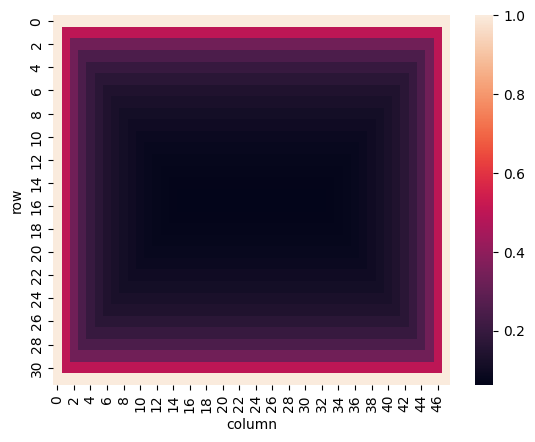

In [12]:
_, ax = plt.subplots()
sns.heatmap(dists, ax = ax)
ax.set_xlabel("column")
ax.set_ylabel("row");

# Exercise 1

Currently, our data looks just like a lot of _numbers_ ; obviously, they do not really make sense when considered individually. The most common way to make sense of such a dataset is to **visualise** it graphically. The first part of this exercise will be to _plot_ the data in various ways, then later use automated methods to _regroup_ similar parts of the data.

## 1a. Plotting individual time series

Since the data represents **time series**, it makes sense to plot the _number of cells_ for each _time point_. In this exercise, we will do that first for a few selected wells in each plate, and then for all wells of each plate.

### A selection of arbitrary wells

First, let's create a plot for each plate, displaying the time series of the wells _(0, 0), (1, 1), (16, 24), (20, 12), (24, 40)_ and _(31, 47)_ :

In [13]:
coords = [(0, 0), (1, 1), (16, 24), (20, 12), (24, 40), (31, 47)]

**Reminder :** The time series of well _(0, 0)_ can be displayed for each plate the following way :

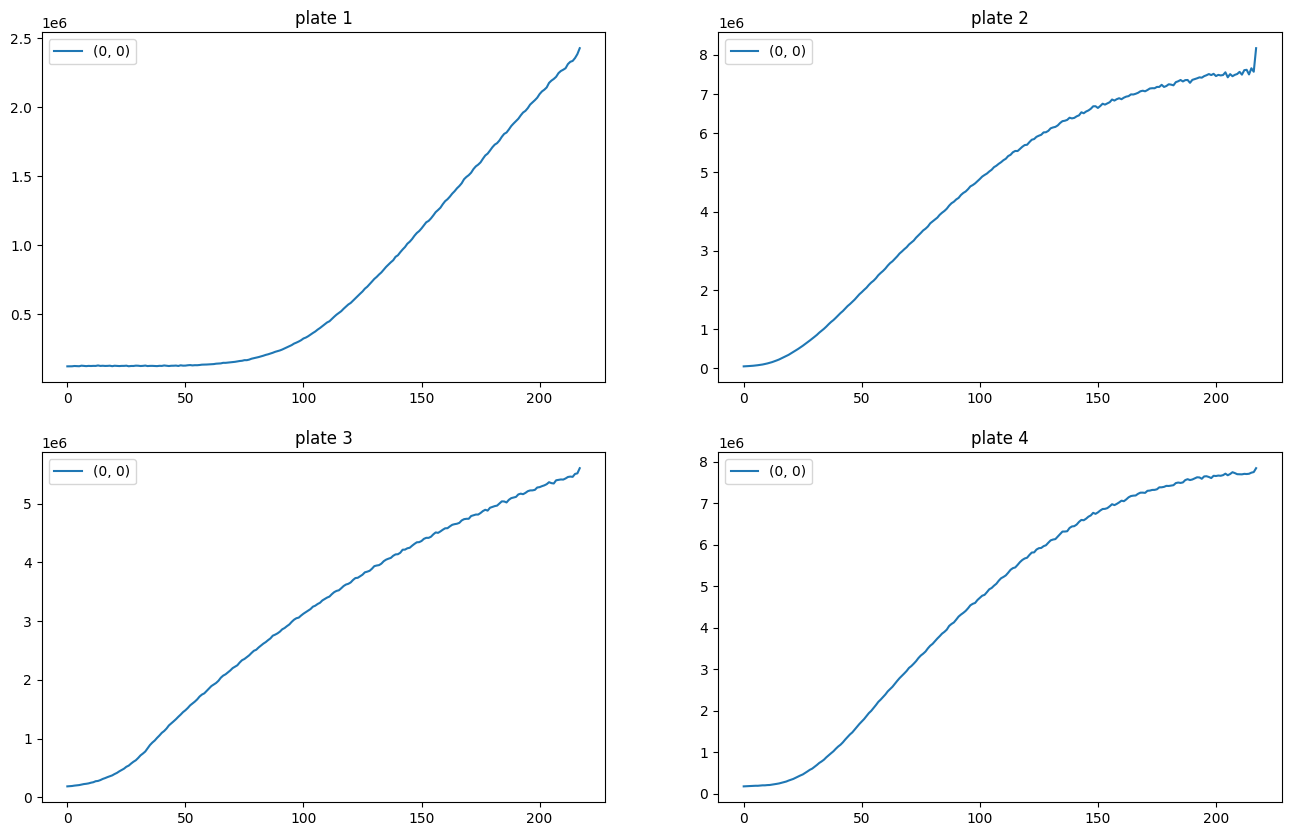

In [14]:
_, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))

for p in range(n_plates):
    axes[p//2, p%2].plot(
        Nt[p, 0, 0],
        label = f"({0}, {0})"
    )
    
    axes[p//2, p%2].set_title(f"plate {p+1}")
    axes[p//2, p%2].legend()

Copy the above code in the cell below, and modify it so that it displays the trajectories of all the coordinates contained in the `coords` variable :

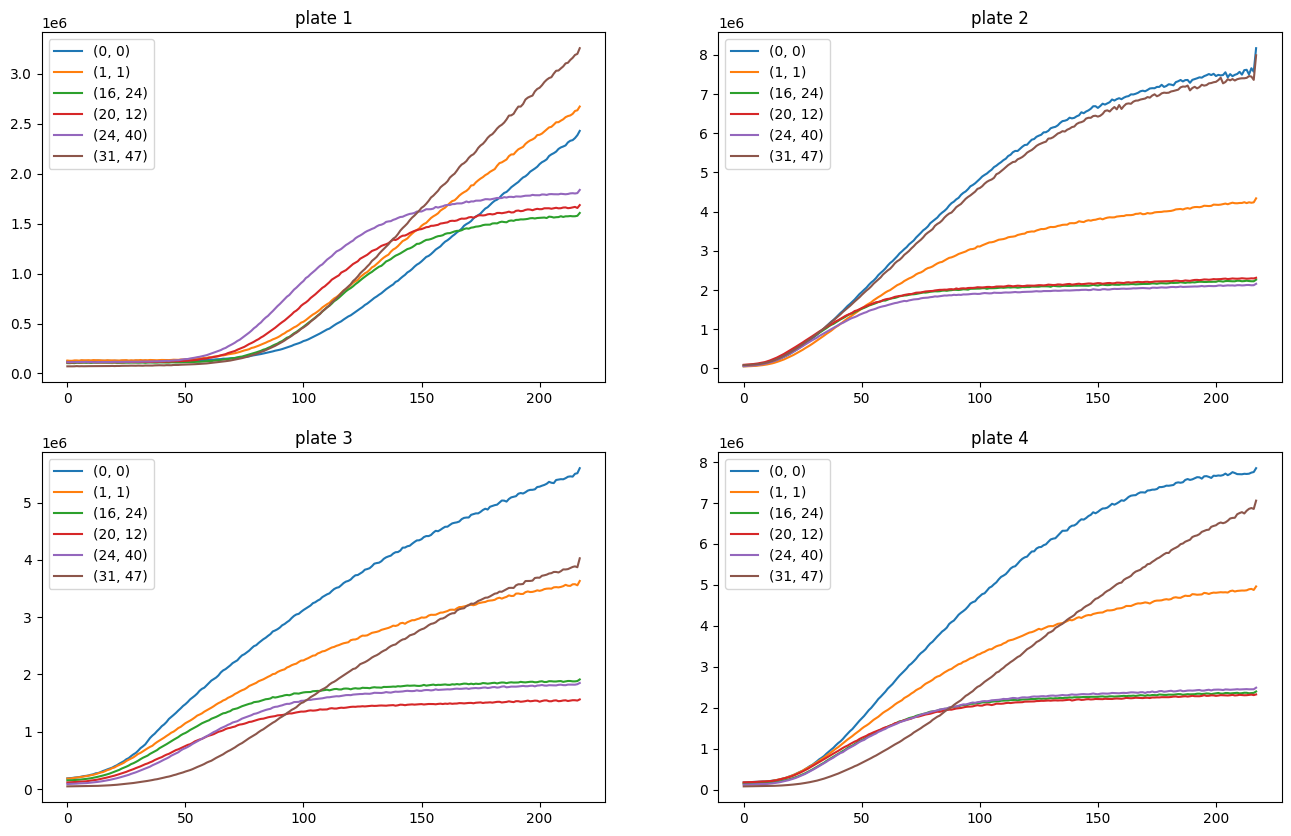

In [15]:
_, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))
for p in range(n_plates):
    for i in range(len(coords)):
        
        cor1 = coords[i][0]
        cor2 = coords[i][1]
        axes[p//2, p%2].plot(
            Nt[p, cor1, cor2],
            label = f"({cor1}, {cor2})",
        )
    axes[p//2, p%2].set_title(f"plate {p+1}")
    axes[p//2, p%2].legend()



**Hint :** In the `for` loop iterating through the plates, nest another `for` loop iterating through the `coords` variable, and place the right function calls into that loop.

You should observe that the wells **close to the border** behave very differently than the ones **far from the border**.

#### Adding colour

Add colour to the lines according to the _inverse distance_ of the wells _to the closest border_ (use a gradient from red to black if in doubt) :

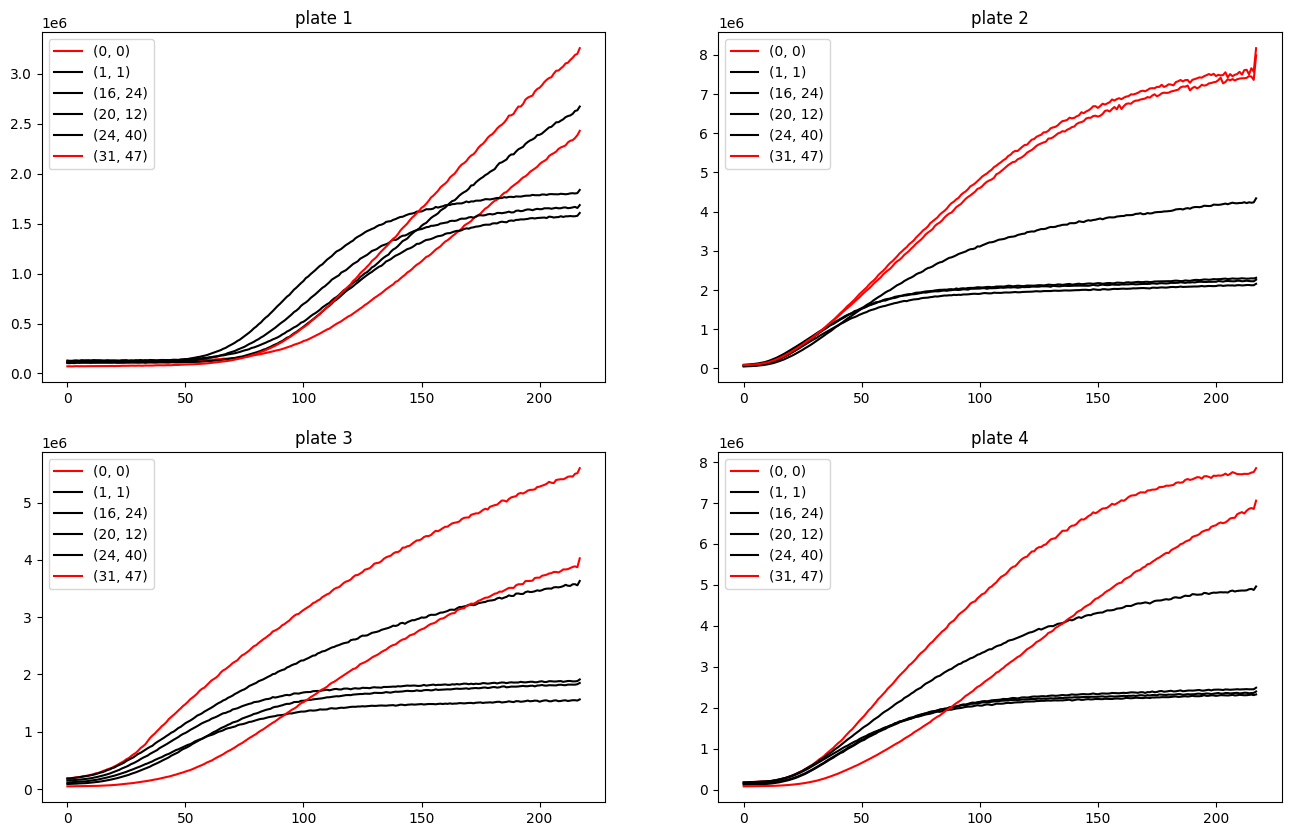

In [16]:
_, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))
for p in range(n_plates):
    for i in range(len(coords)):
        
        cor1 = coords[i][0]
        cor2 = coords[i][1]
        color_number = int("{:.0f}".format(dists[cor1,cor2]))
        axes[p//2, p%2].plot(
            Nt[p, cor1, cor2],
            label = f"({cor1}, {cor2})",
            color = (color_number, 0.0, 0.0)
            
        )
    axes[p//2, p%2].set_title(f"plate {p+1}")
    axes[p//2, p%2].legend()





**Hint 1 :** The `dists` variable maps for every well in a plate, the value you seek. So the _inverse distance_ of the well _(r, c)_ _to the closest border_ can be obtained as `dists[r, c]`.
(Note that these values are between 0 and 1.)

**Hint 2 :** _PyPlot_'s `plot` function has a `color` parametre which you can use the following way : a colour is represented as a combination of **RGB** values, which means a gradient from black to red can be obtained by varying the red component of the RGB triplet you provide to the `color` parametre. [More on colours here.](https://matplotlib.org/stable/tutorials/colors/colors.html "Really, read the docs !")
A few examples :
* **black** is _(0, 0, 0)_
* **red** is _(1, 0, 0)_
* **cyan** is _(0, 1, 1)_
* **orange** is _(1, 0.5, 0)_

### All the trajectories

Now plot **all** trajectories of each plate instead of just the few arbitrary coordinates from above, with the same colour scheme :

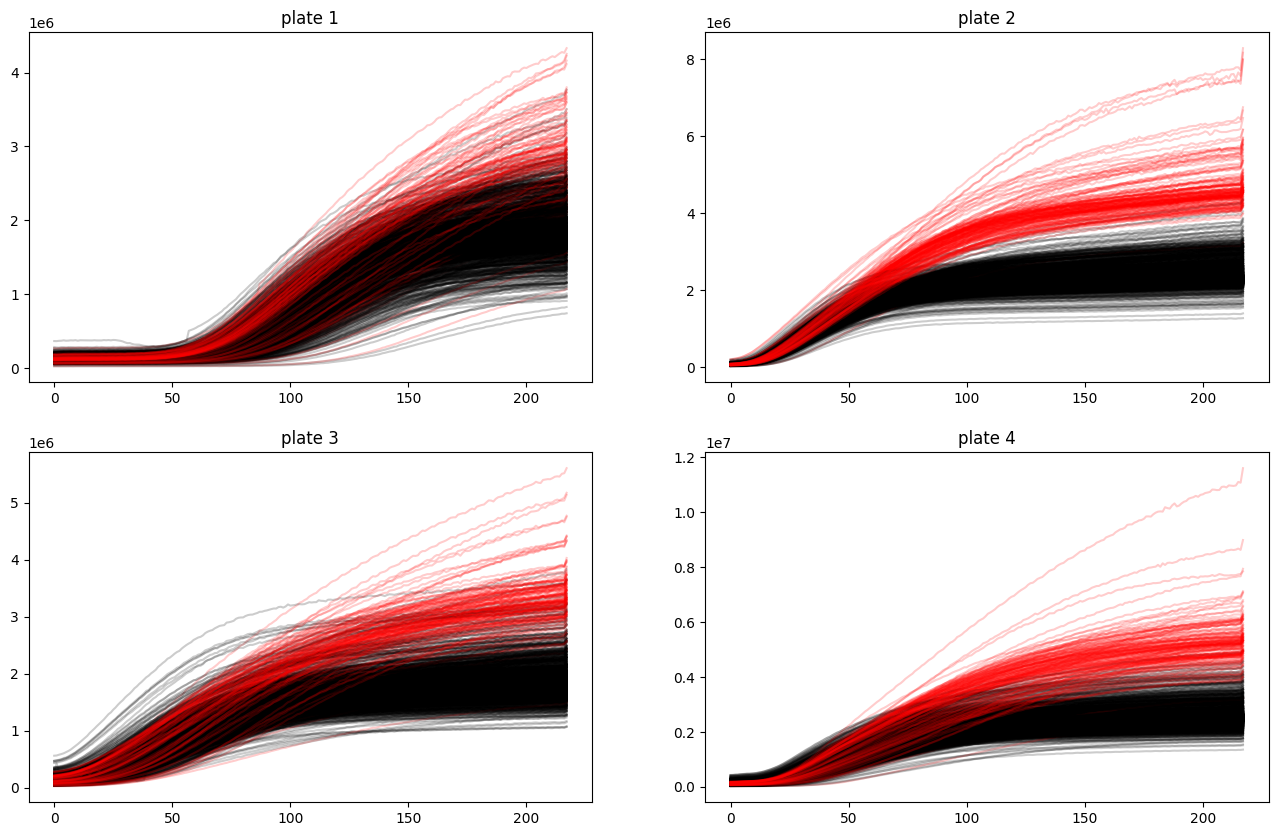

In [20]:
#plate, row, column
_, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))


for p in range(n_plates):
    for r in range(n_rows):
        for c in range(n_columns):
            color_number = int("{:.0f}".format(dists[r,c]))
            axes[p//2, p%2].plot(
                Nt[p, r, c],
                #label = f"({r}, {c})",
                color = (color_number, 0.0, 0.0),
                alpha = 0.2
            )
    axes[p//2, p%2].set_title(f"plate {p+1}")
    #axes[p//2, p%2].legend()



(By the way, it is normal for this plot to take more time to generate.)

#### Comment here on how the plates differ

For all plates the scales are different on the y-axis (the growth)
<br>
Plate 1: Scale is from 0 to 4  Here the growing is close to zero until the time point ~50 and afterwards with some differences according to the distance from the border. It also seems that there is great variance among the wells in the "middle" or farther away from the borders.  <br>

Plate 2: Scale is here from o to 8, with the biggest growth values. The growth curve on red is some what linear. With this plate there is very big difference between the wells that are close to the borders compared to the ones at the center. The growth is also very fas compared to others.
<br>

Plate 3: Here the scale is from 0 to 5 and the groth start much earlier than for example in plate 1. Again great variety with the wells closer to the centre (black ones). 
<br>

Plate 4: The scale is from 0 to 1.2 indicating smallest growth there from all of the 4 plates. Also the curves are not that steep comparing to the other plates. 

We can see in all plates that the wells that are close to the edge grow quicker than the ones farther away from the border. This is maybe due to more space or nutrients ? Or a biological explaining factor in general.

## 1b. Plotting statistics

As can be seen from the trajectories, there is a **high diversity** on each plate. Since the plates are two-dimensional, there are two ways to display it : as a _histogram_ or as a _heatmap_.

### Histograms

A common way to summarise datasets is to use a **histogram** ; _PyPlot_ has a function called [hist](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) which can plot a histogram for you, if provided with a 1-dimensional array of values.

This function can be used the following way, if for example you want to plot a histogram of the cell numbers of each plate at coordinate _(0, 0)_ :

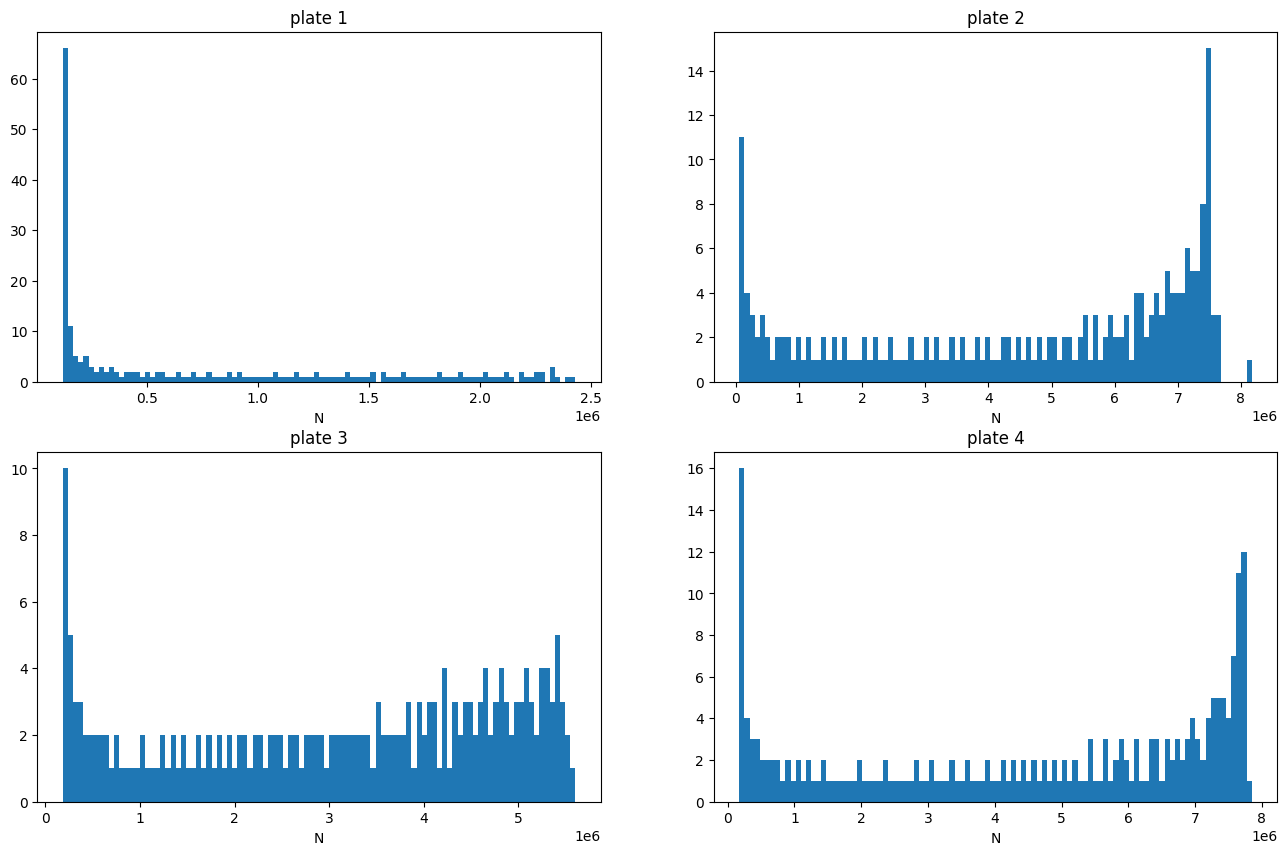

In [20]:
_, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))

for p in range(n_plates):
    axes[p//2, p%2].hist(data[p, 0, 0], bins = 100)
    axes[p//2, p%2].set_title(f"plate {p+1}")
    axes[p//2, p%2].set_xlabel("N")
    


Plot here for each plate a histogram of the number of cells at **time 0** (use 100 bins) :<br>
**Hint :** A time slice of the data is a 2x2 matrix, and you need a 1-dimensional array. Use the `reshape` method to make that transformation.

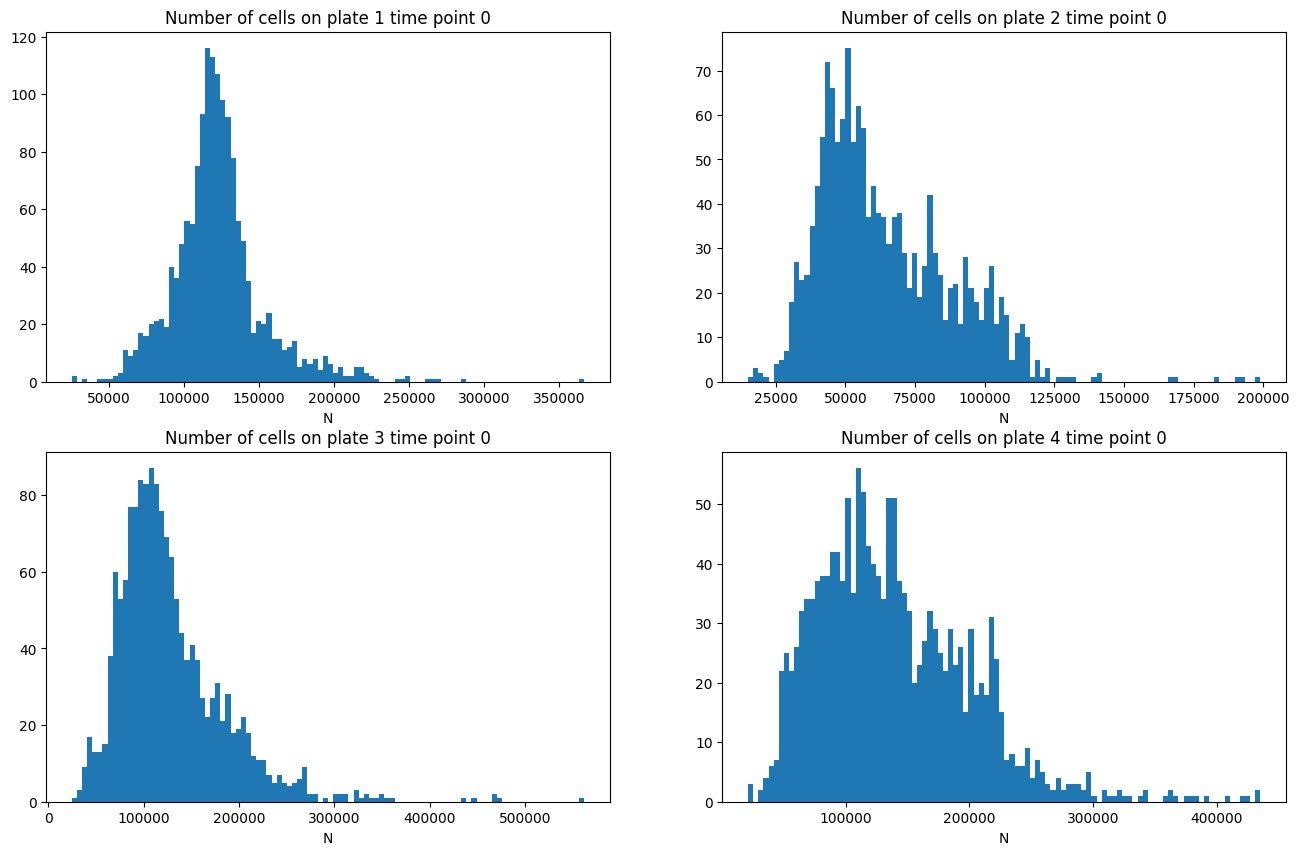

In [34]:
_, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))

for p in range(n_plates):
    axes[p//2, p%2].hist(data[p, :,:,0].reshape(-1) , bins = 100)
    axes[p//2, p%2].set_title(f"Number of cells on plate {p+1} time point 0")
    axes[p//2, p%2].set_xlabel("N")

plt.show()

and at **time 217** :

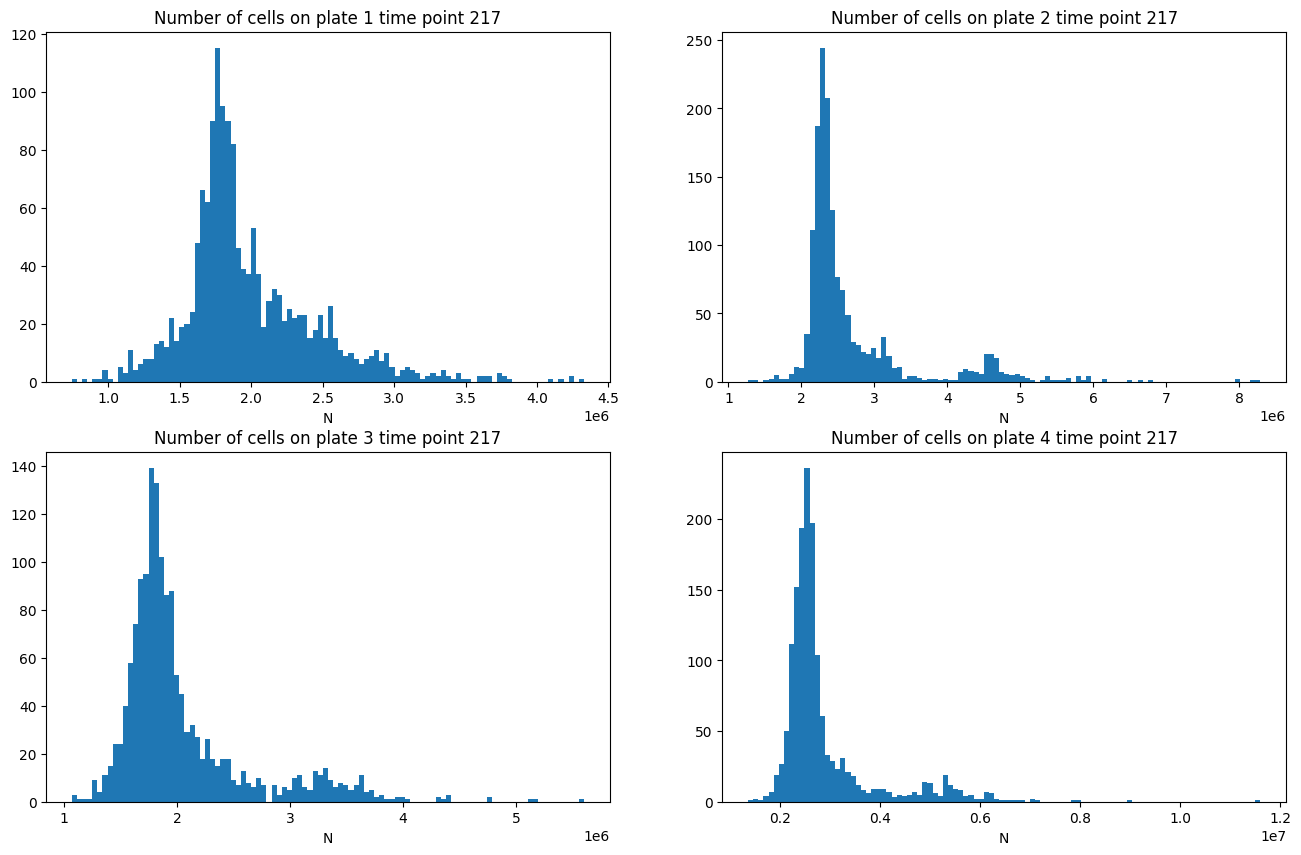

In [35]:
_, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))
plt.title('Test')
for p in range(n_plates):
    axes[p//2, p%2].hist(data[p, :,:,217].reshape(-1) , bins = 100)
    axes[p//2, p%2].set_title(f"Number of cells on plate {p+1} time point 217")
    axes[p//2, p%2].set_xlabel("N")
plt.show()

#### Comment here on how the variance changes between the two times

**Answer :** <br>  At time point 217 there are only few cells 1-10 when in contrast on time point 0 there are 0 to 100,000 cells. So the variance decreases when time moves on. Microbial growth has 4 stages 1) lag- 2) log/exponential-, 3) stationary and 4) death. When the groth starts the number of cells per unit time is proportional to the present population. This will continue at a constant rate until after certain point in time the growth cannot grow anymore. This is due to a growth-limiting factor such as nutrient, space or other biological component.

#### Comment here on what the outliers at time 217 represent, on plates 2-4: 

**Answer :** I am again some what confused what is asked here. But on the time point 217 in plates 2, 3 and 4 the variance is different compared to plate 1. The most common cell count is pretty similar (the peak) on plates 2 and 3 comparedto 1. The plate 4 seems to have very few dividing cells left so the peak is high but not big on the x-axis. Maybe this difference in variance within a plate is due to the distance to border? I don't know how the plates differ from each other so hard to comment that. 

### Heatmaps

Another common way, particularly relevant for 2-dimensional data such as a grid, is to visualise it as a **heatmap** ; though _PyPlot_'s function called `imshow` can be used for that purpose, the _seaborn_ module has a [heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html "Again, read the docs ! ;)") function which is much more powerful.

Plot here for each plate a heatmap of the number of cells at **time 0** :

In [26]:
data[:, :,:,0].shape

(4, 32, 48)

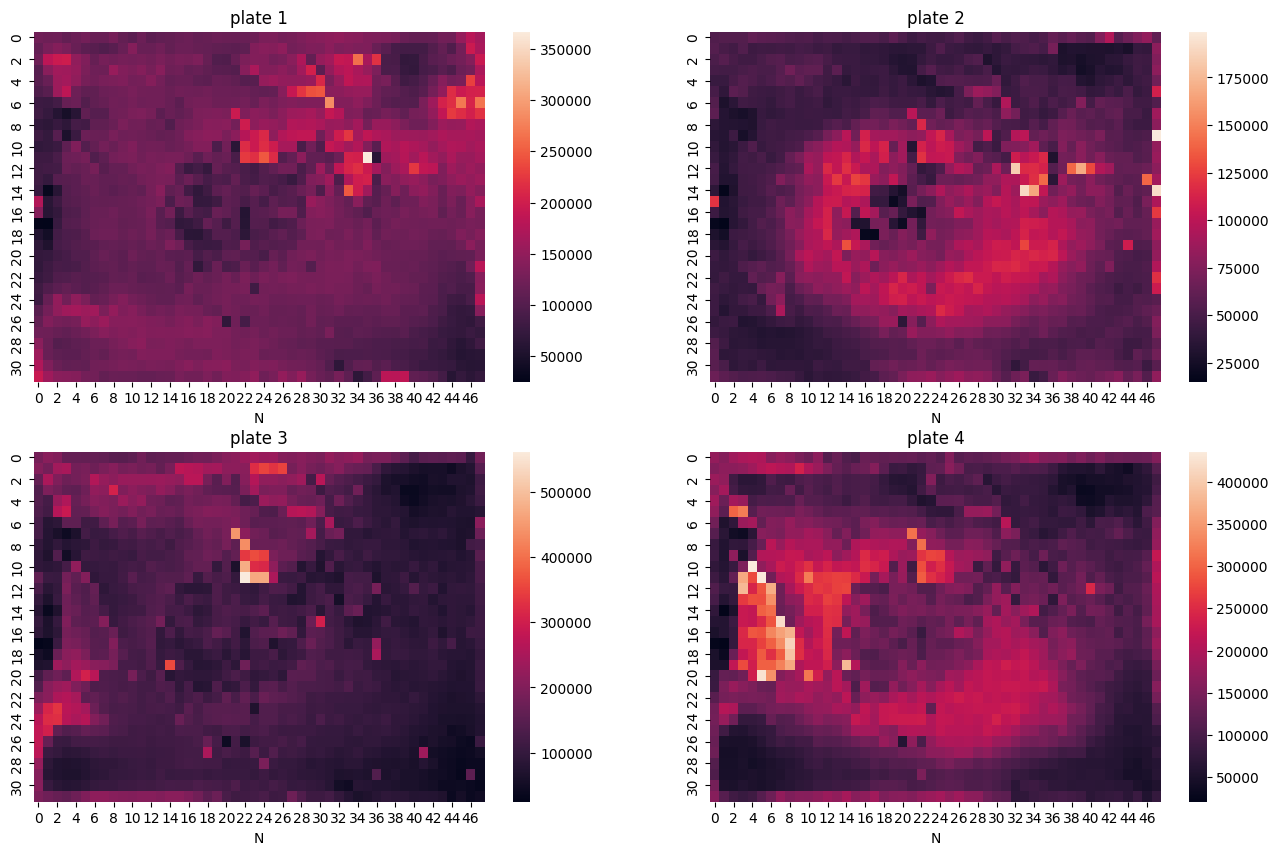

In [27]:
_, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))
plt.title('Test')
for p in range(n_plates):
    sns.heatmap(data[p, :,:,0], ax=axes[p//2, p%2])
    axes[p//2, p%2].set_title(f"plate {p+1}")
    axes[p//2, p%2].set_xlabel("N")

and at **time 217** :

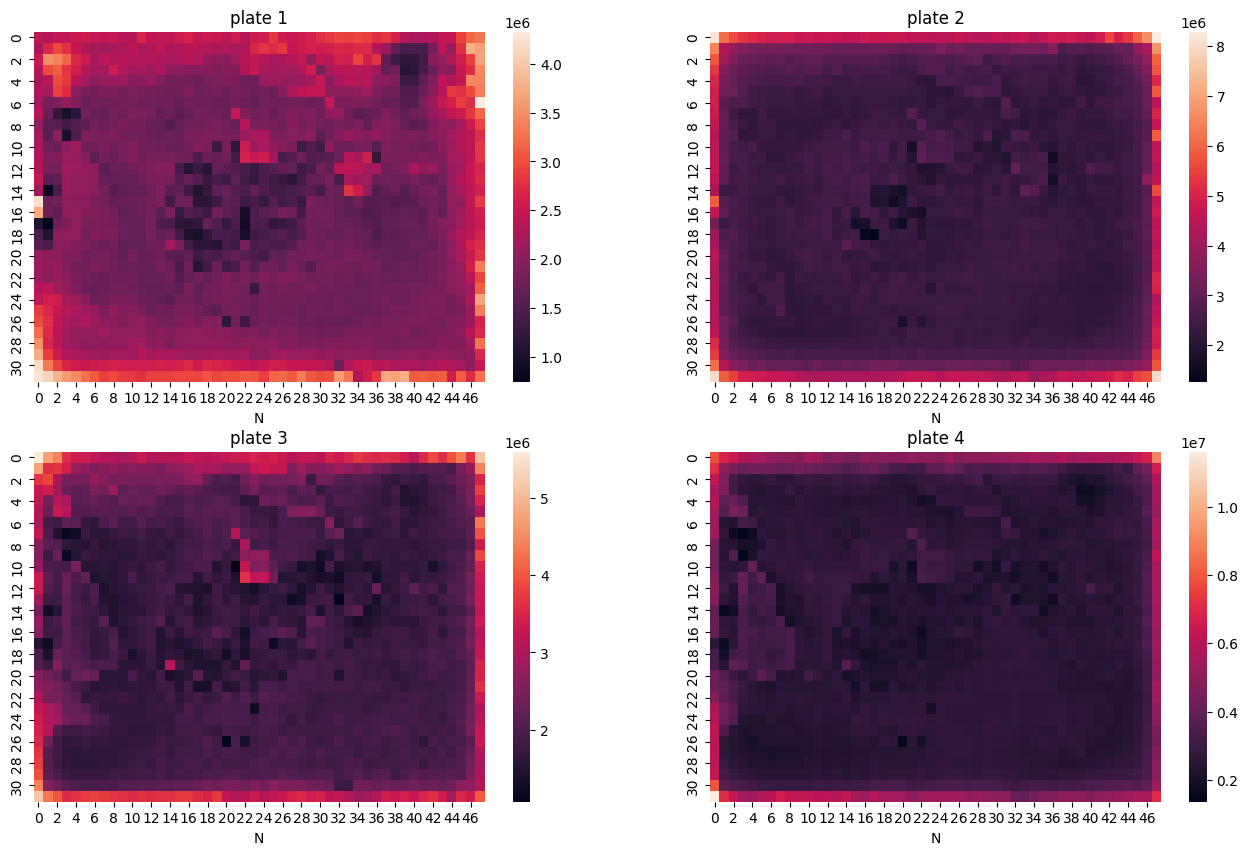

In [28]:
_, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (16, 10))
for p in range(n_plates):
    sns.heatmap(data[p, :,:,217], ax=axes[p//2, p%2])
    axes[p//2, p%2].set_title(f"plate {p+1}")
    axes[p//2, p%2].set_xlabel("N")

#### Comment here on how the structure of the sizes differ between the two times

**Answer :** 

## 1c. Dimensionality reduction and clustering

It is fortunate that we can use intuition such as the distance to the border of the plate, to distinguish different time series. But this kind of intuition does not allow us to go further into categorising the data. The standard technique for investigating data in an automated fashion is to first **reduce its dimensionality** and then to run a **clustering** algorithm, allowing us to group similar data.

### PCA

#### All plates

Let's start with dimensionality reduction ; one very common algorithm that allows that is **PCA**. We can use it on the whole data regardless of the plate, with _two components_, and project the data into the new space (read the [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html "Docs often have an example section.") to understand how the transformation to a new space is performed) :

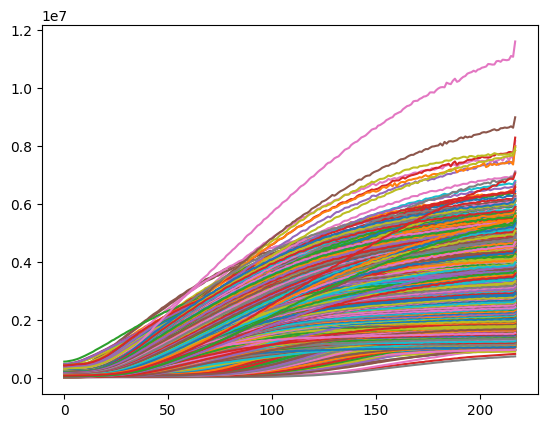

In [29]:
plt.plot(Nt)
plt.show()


In [36]:

pca_all = pd.DataFrame(
    data    = PCA(n_components = 2).fit_transform(Nt.T),
    columns = ["component 1", "component 2"],
    index   = Nt.columns
)

Having a _two components_ decomposition means we decompose our set of time series as a **set of points in a 2D space**. This means, we can plot them as a _scatter plot_ ; when doing that, try to colour each point according to the plate it belongs to :

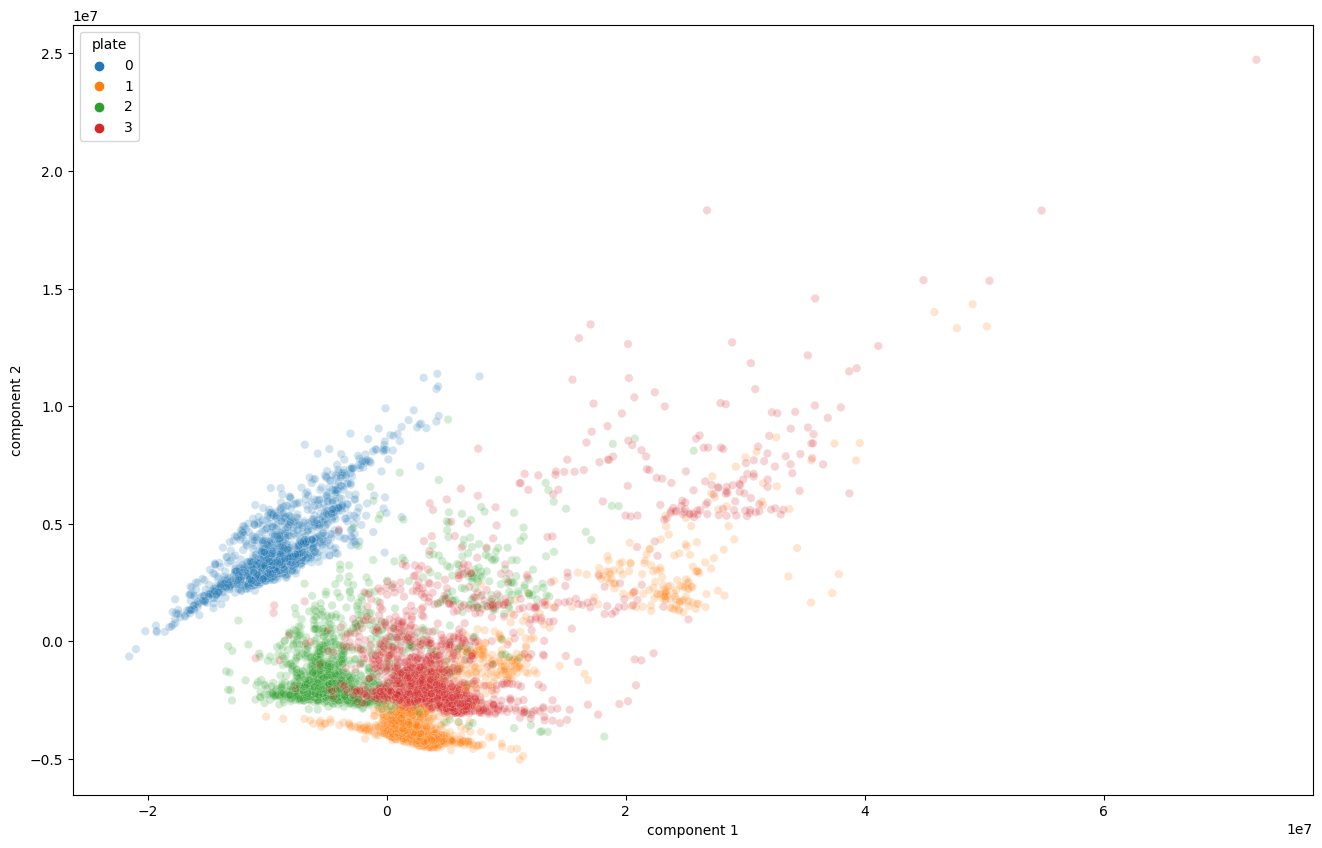

In [37]:
_, ax = plt.subplots(figsize = (16, 10))

sns.scatterplot(
    x       = "component 1",
    y       = "component 2",
    hue     = "plate",
    data    = pca_all.reset_index(level = 0),
    palette = sns.color_palette(n_colors = n_plates),
    alpha   = 0.2,
    ax      = ax
);

#### Comment here on how well the plates are separable

**Answer :** <br> Since the PCA reduces it to two dimension and representing the directions of maximum variance in the data.
Plate 0 is very different but 

#### Individual plates

Instead of grouping the whole data from all plates, this time, reduce the dimensionality of each plate individually.
Plot the decompositions for each plate on a different _scatter plot_, but this time give the colours according to the **distance to the border of the plate**:
<br>**Hint :** You can pass the `dists` variable to the _hue_ parametre, provided you linearise it into a 1-dimensional array.


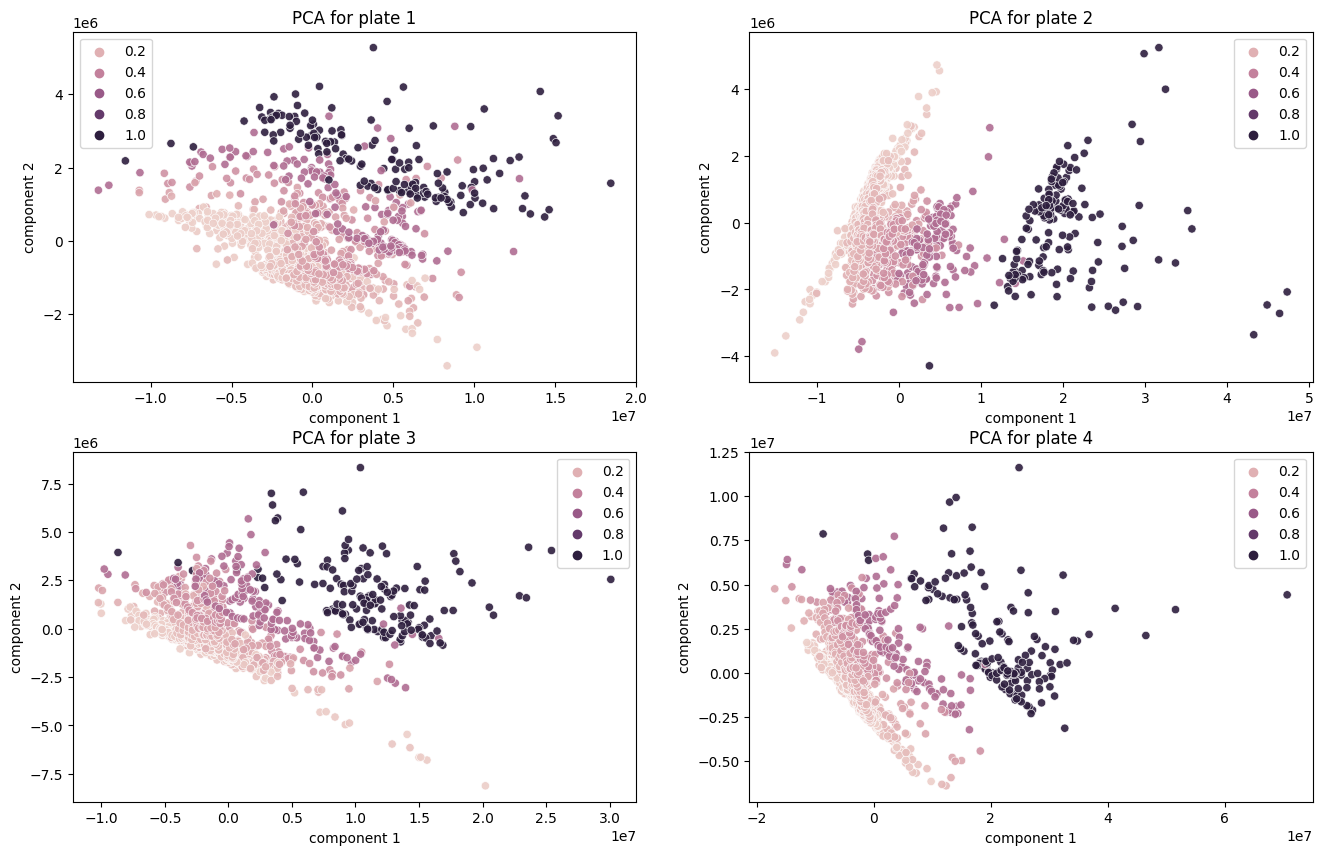

In [51]:
_, axes = plt.subplots(ncols = 2, nrows = 2, figsize = (16, 10))

for p in range(n_plates):
    pca_each= pd.DataFrame(
        data    = PCA(n_components = 2).fit_transform(Nt[p].T),
        columns = ["component 1", "component 2"],
        index   = Nt[p].columns,

    )
    sns.scatterplot(
        x       = "component 1",
        y       = "component 2",
        data    = pca_each.reset_index(level = 0),
        hue     = dists.flatten(),
        #size    = dists.flatten(),
        alpha   = 0.9,
        ax      = axes[p//2, p%2]
).set(title= f'PCA for plate {p+1}');

#### Comment here on how well the populations are separable : 


**Answer :** There is most difference in the plate 3 and 4 

### t-SNE (bonus exercise)

C:\Users\Heidi\anaconda3\envs\r-kernel\lib\site-packages\sklearn\manifold\_t_sne.py:800: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
C:\Users\Heidi\anaconda3\envs\r-kernel\lib\site-packages\sklearn\manifold\_t_sne.py:810: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


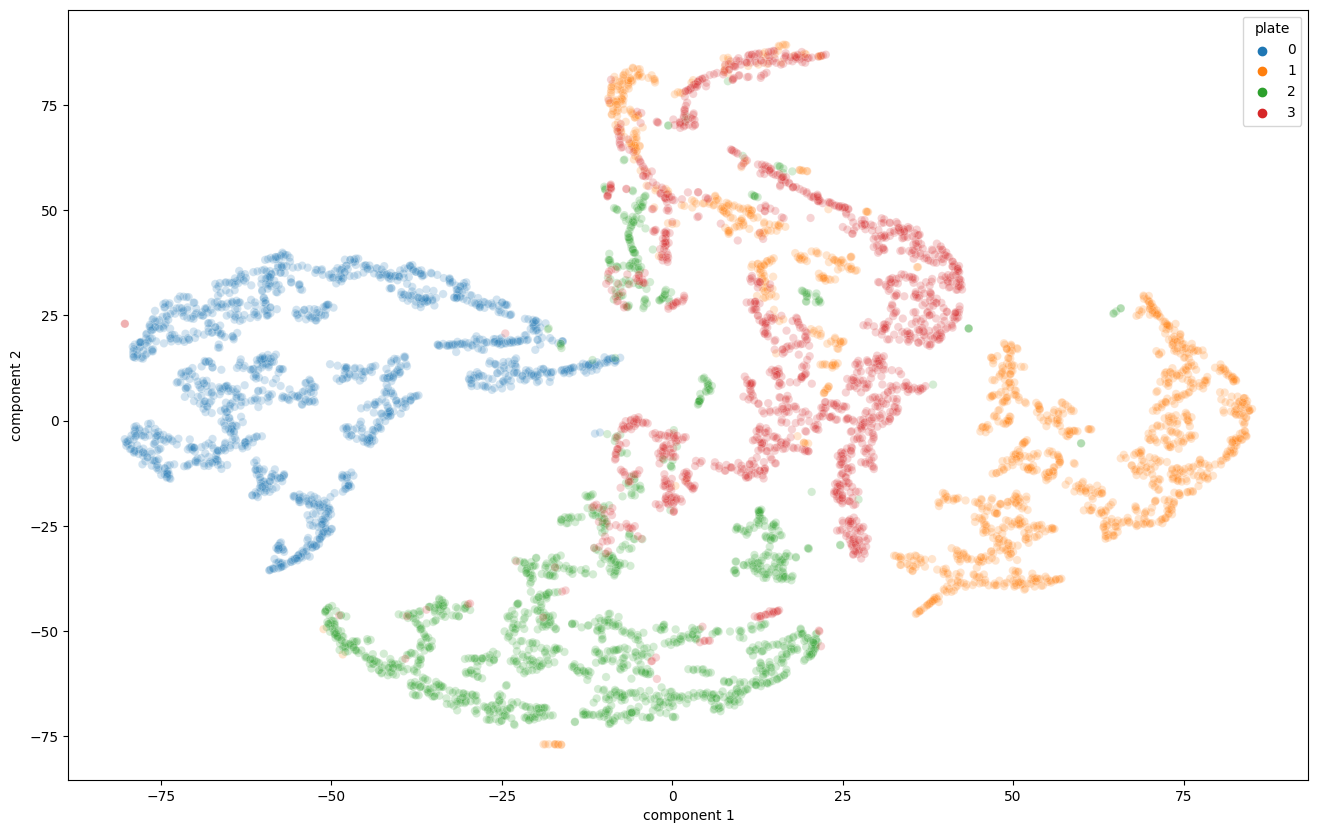

In [33]:
tSNE_all = pd.DataFrame(
    data    = TSNE(n_components = 2).fit_transform(Nt.T),
    columns = ["component 1", "component 2"],
    index   = Nt.columns
)
_, ax = plt.subplots(figsize = (16, 10))

sns.scatterplot(
    x       = "component 1",
    y       = "component 2",
    hue     = "plate",
    data    = tSNE_all.reset_index(level = 0),
    palette = sns.color_palette(n_colors = n_plates),
    alpha   = 0.2,
    ax      = ax
);

### K-Means (bonus exercise)

# Exercise 2

The previous exercise was about _exploring_ the time series data ; making _sense_ of it. Exercise 2 on the other hand, is about **fitting** the data to a _model_ ; after all, we want to **explain** the data in an abstract form, not just compare numbers and features.

The model we choose is a variant of the _generalised logistic curve_ or **Richards' curve**, which is recurrent in biology :
$$
    N(t) = \beta + \frac{L_f}{(1 + \nu e^{-k(t-t_m)})^{1/\nu}}
$$

## 2a. Training : linear fit

The fits for the above model are going to be difficult to perform. In order to learn to use a fitting tool called [curve_fit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.curve_fit.html), we will start by fitting a **linear model** :
$$
    N(t) = at + b
$$
The idea of a fit is to find values for the parametres $a$ and $b$ so that the model _fits_ the data we try to fit.

Let's do this for plate 1 at coordinate _(16, 16)_ :

In [38]:
#time points of data 
ts = np.arange(n_points)

In [39]:
(a, b), _ = curve_fit(
    f     = lambda t, a, b: a * t + b,   
    xdata = ts,
    ydata = Nt[0, 16, 16]
)


and comparing the fit to the actual data :

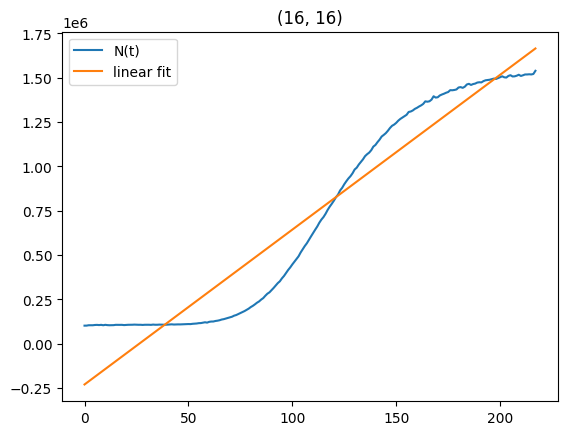

In [40]:
plt.plot(ts, Nt[0, 16, 16], label = "N(t)") #blueline on the plot 
plt.plot(ts, a * ts + b, label = "linear fit")
plt.title(f"({16}, {16})")
plt.legend();

Start by performing the fits, and store the obtained values into this variable :<br>
Now plot the linear fits against the data as done above, for every coordinate :

C:\Users\Heidi\AppData\Local\Temp\ipykernel_11668\2745398466.py:41: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([p1,p2],labels = line_labels)


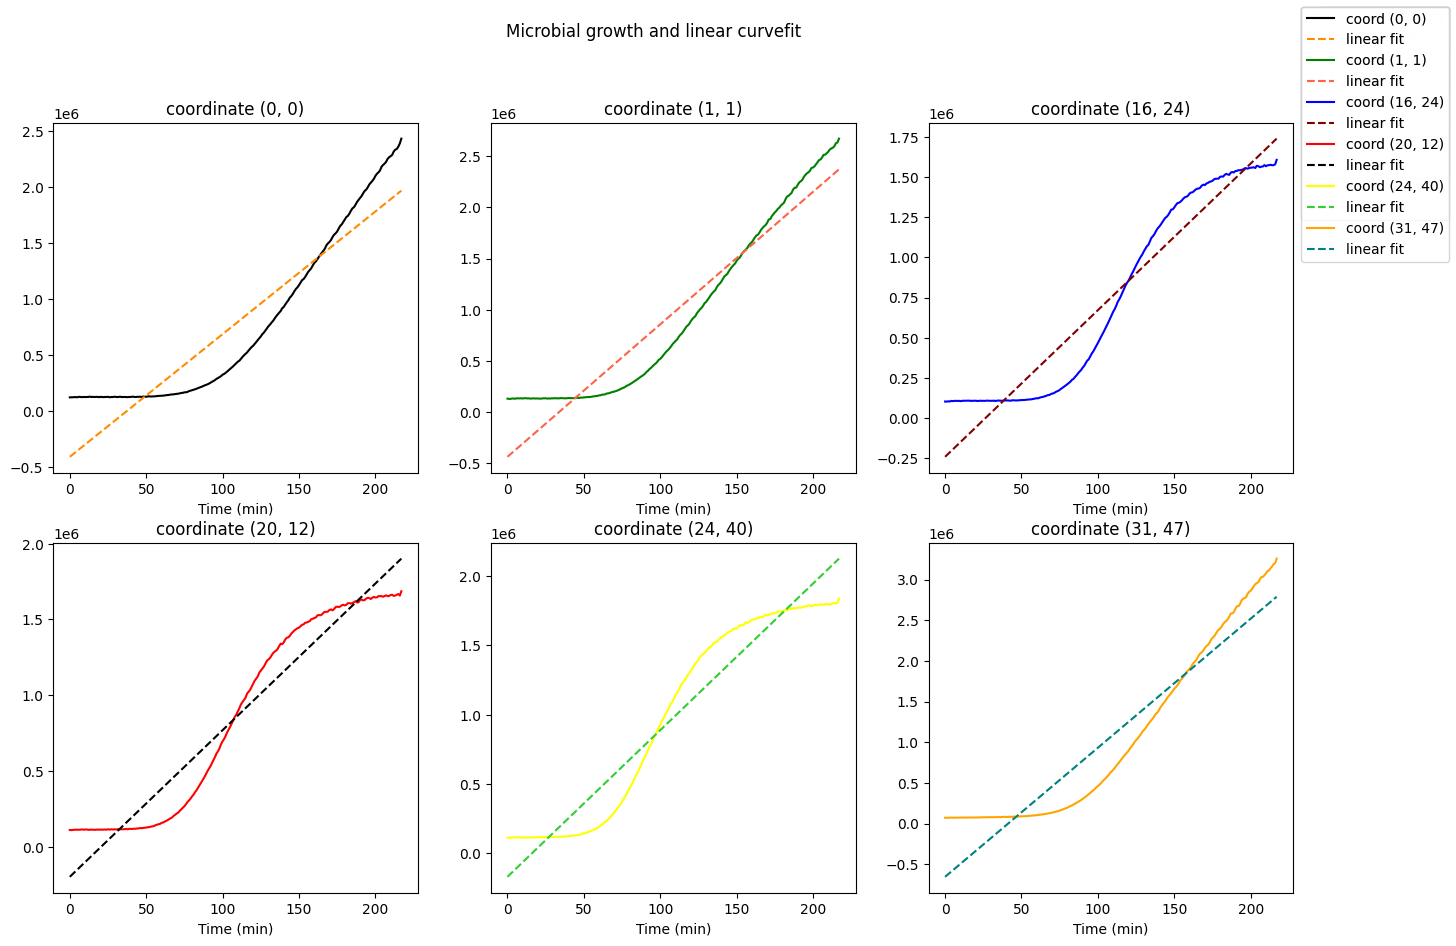

In [41]:
listt = []
coords = [(0, 0), (1, 1), (16, 24), (20, 12), (24, 40), (31, 47)]
for c in coords:
    (a, b), _ = curve_fit(
    f     = lambda t, a, b: a * t + b,   
    xdata = ts,
    ydata = Nt[0, c[0], c[1]])
    
    listt.append((a,b)) 

plot_location = 1

    
fig, axes = plt.subplots(2,3,figsize = (16, 10))
fig.suptitle('Microbial growth and linear curvefit')

line_labels = []
colors = ['black','green','blue','red','yellow','orange']
colors2 = ['darkorange','tomato','maroon','black','limegreen','teal']
for c in coords:
    (a,b), _ =  curve_fit(
        f     = lambda t, a, b: a * t + b,
        xdata = ts,
        ydata = Nt[0, c[0], c[1]])
    
    plt.subplot(2,3,plot_location)
    line_labels.append(f"coord {c}")
    line_labels.append("linear fit ")
    p1 = plt.plot(ts,
                  Nt[0, c[0],c[1]],
                  color = colors[plot_location-1]
                 )
    plt.title(f"coordinate {c}")
    p2 = plt.plot(ts,
                  a * ts + b,
                  linestyle = 'dashed',
                  color =colors2[plot_location-1]
                 )
    plot_location+=1
    plt.xlabel("Time (min)")
    fig.legend([p1,p2],labels = line_labels)
    


Perform a series of linear fits for the set of coordinates below :

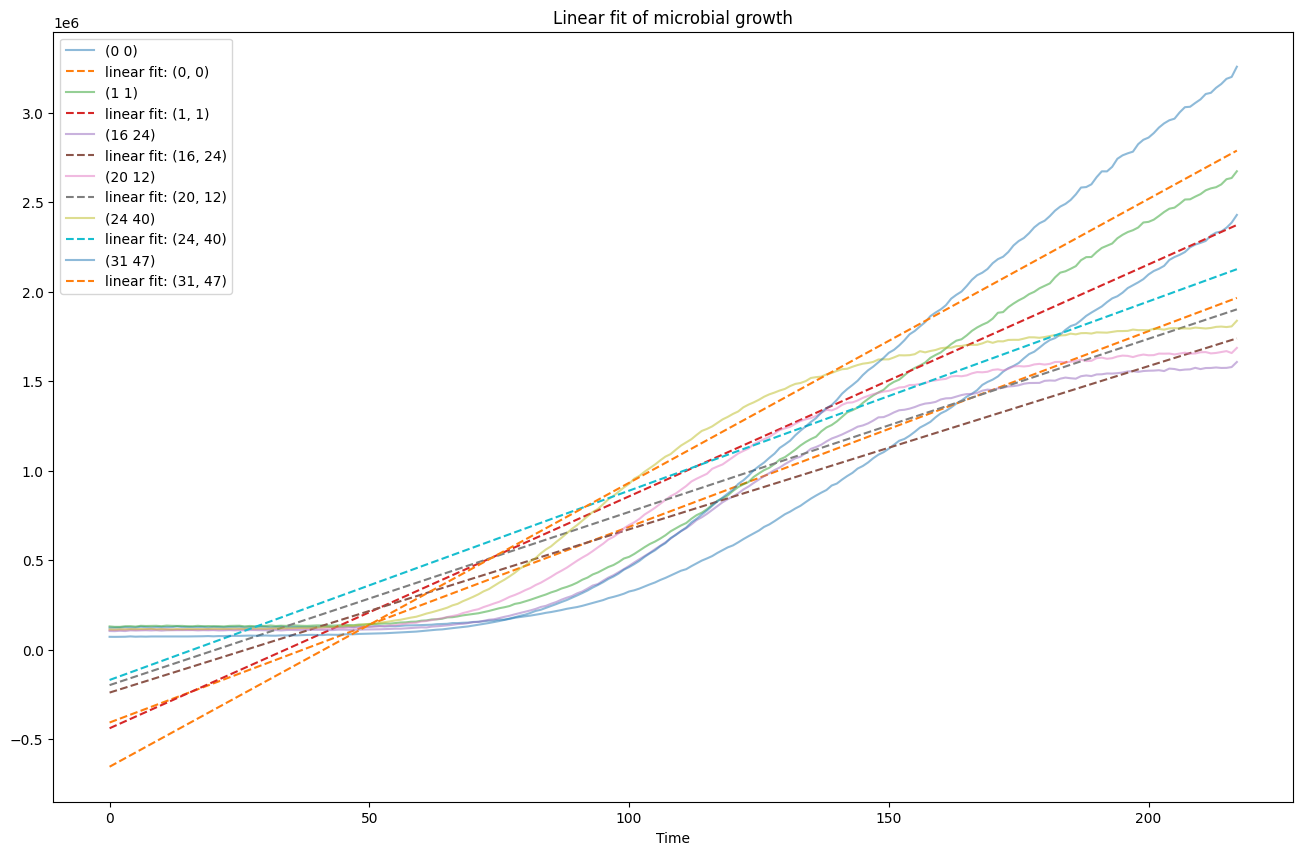

In [42]:
#something something first try

_, axes = plt.subplots(figsize = (16, 10))
for c in coords:
    (a,b), _ =  curve_fit(
        f     = lambda t, a, b: a * t + b,
        xdata = ts,
        ydata = Nt[0, c[0], c[1]])
    plt.plot(ts, Nt[0, c[0], c[1]], label = f"({c[0]} {c[1]})", alpha = 0.5)
    plt.plot(ts, a * ts + b, label = f"linear fit: {c}", linestyle = 'dashed')
#plt.plot(ts, a * ts + b, label = "linear fit", linestyle = 'dashed')
axes.set_title("Linear fit of microbial growth");
axes.set_xlabel("Time")

plt.legend();

In [39]:
coords = [(0, 0), (1, 1), (16, 24), (20, 12), (24, 40), (31, 47)]

#### Comment here on why the fits work well or not

**Answer :** does't work that well cause the growth is not linear. The growth is pretty slow until the 75 timepoint. Also the growth is differen in the different coordinates, hence the closer to the edge the coordinates the more the real data curve seems like exponential growth. <br>
In general the fittin is some places (at the beginnig) values are too small and the at some point the values are bigger than in real data. 

## 2b. Upgrade : logistic model

A common model encountered in growth problems is the **logistic curve** :
$$
    N(t) = \frac{L}{1 + e^{-k(t-t_0)}}
$$
This model has 3 parametres ($L$, $k$ and $t_0$) which are to be fitted.

In [43]:
def lm(t, l, k, t0):
    return l / (1 + np.exp(-k * (t - t0)))

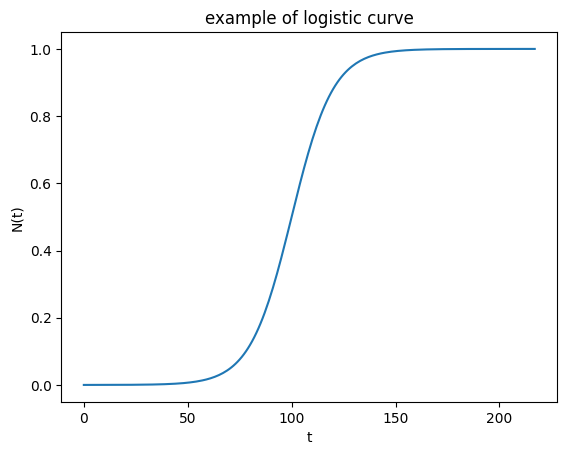

In [44]:
plt.plot(ts, lm(ts, l = 1, k = 0.1, t0 = 100))
plt.title("example of logistic curve")
plt.xlabel("t")
plt.ylabel("N(t)");

### The catastrophic failure

Adapt the code you wrote above in order to fit this time the `lm` function given above instead of a linear model :

In [46]:
list_fitted = []
coords = [(0, 0), (1, 1), (16, 24), (20, 12), (24, 40), (31, 47)]
for c in coords:
    (L, k,t0), _ = curve_fit(
    f     = lm,   
    xdata = ts,
    ydata = Nt[0, c[0], c[1]])
    
    list_fitted.append((L,k,t0)) 


C:\Users\Heidi\AppData\Local\Temp\ipykernel_11668\3399123154.py:28: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([p1,p2],labels = line_labels)


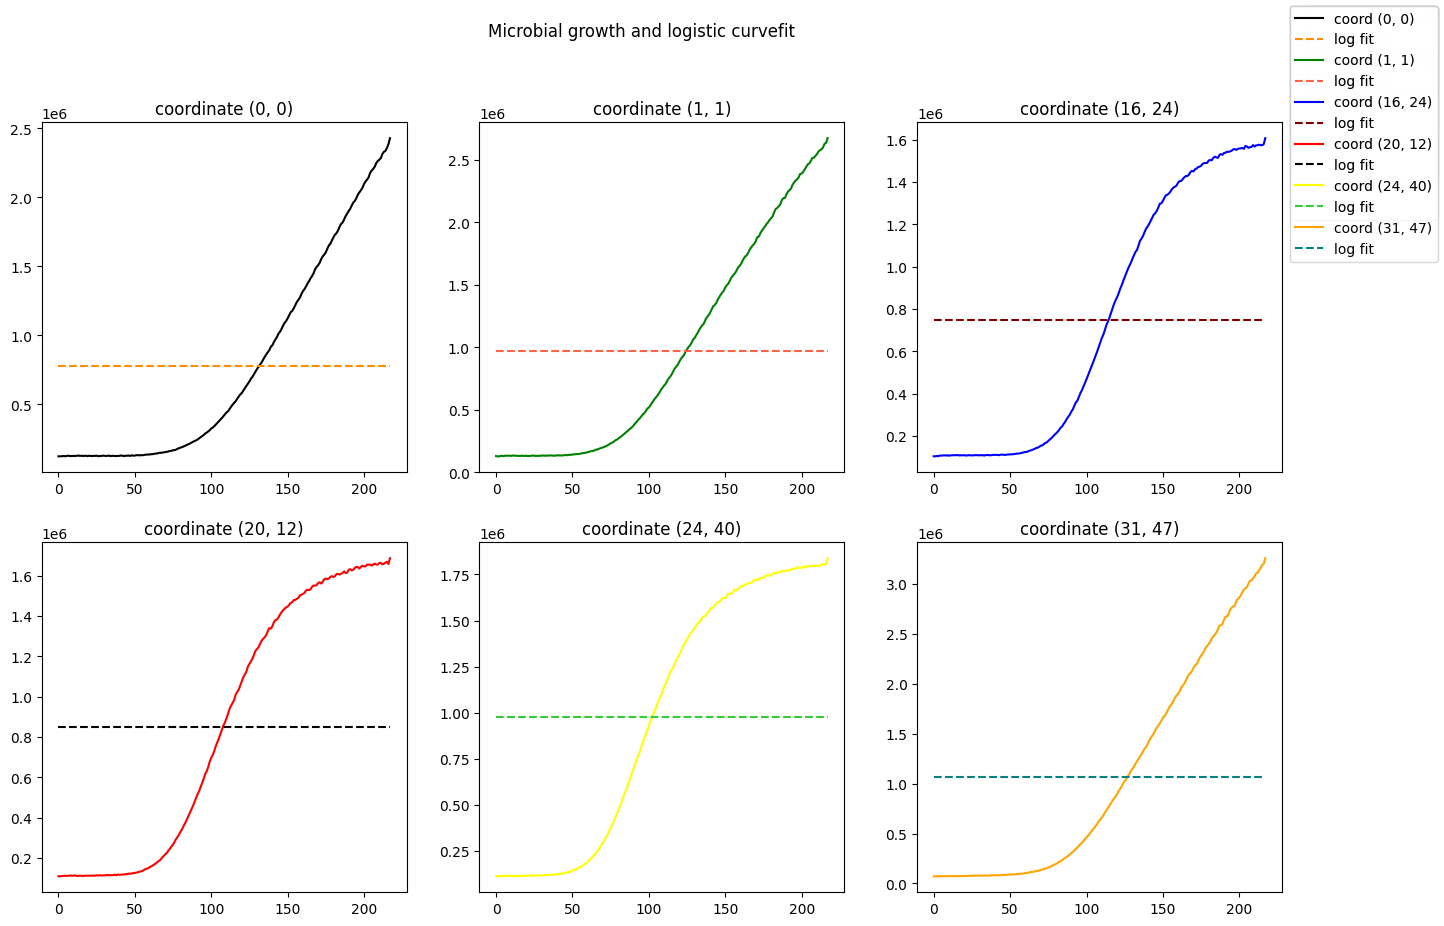

In [47]:
plot_location = 1
   
fig, axes = plt.subplots(2,3,figsize = (16, 10))
fig.suptitle('Microbial growth and logistic curvefit')
line_labels = []
colors = ['black','green','blue','red','yellow','orange']
colors2 = ['darkorange','tomato','maroon','black','limegreen','teal']
for c in coords:
    (L, k,t0), _ = curve_fit(
        f     = lm,   #calling the lm function 
        xdata = ts,
        ydata = Nt[0, c[0], c[1]])
    
    #list_fitted.append((L,k,t0)) 
    plt.subplot(2,3,plot_location)
    line_labels.append(f"coord {c}")
    line_labels.append("log fit ")
    p1 = plt.plot(ts,
                  Nt[0, c[0],c[1]],
                  color = colors[plot_location-1])
    
    plt.title(f"coordinate {c}")
    p2 = plt.plot(ts,
                  lm(ts,L,k,t0),
                  linestyle = 'dashed',
                  color =colors2[plot_location-1])
    plot_location+=1
    fig.legend([p1,p2],labels = line_labels)

Have a look at the values stored in `params` (in particular the third column, the $t_0$) :

In [44]:
params = list_fitted

pd.DataFrame(
    data    = params,
    columns = ["L", "k", "t0"],
    index   = coords
)

L          k         t0
(0, 0)    7.791423e+05  53.353919 -84.324379
(1, 1)    9.667949e+05  45.061540 -70.297490
(16, 24)  7.496366e+05  47.241960 -74.011074
(20, 12)  8.515652e+05  43.955396 -69.002607
(24, 40)  9.781239e+05  39.076641 -61.257933
(31, 47)  1.067142e+06  23.158204 -35.140450

#### Comment here on what you observe about these failed fits

**Answer :** the t0 is getting negative values and the curve is flat, don't know why ? According to my knowledge the flatness is due to the functions slope is zero.

### The improvement

In order to obtain a _sigmoid_, the values of $t_0$ and $k$ have to be constrained. The solver might make better assumptions if we give hints on the values of the parametres ; one way is to set such constraints. We will choose the following constraints :
* $L \in ]0, \infty[$
* $k \in ]0, 1]$
* $t_0 \in [0, \infty[$

Copy your above code, but this time providing these constraints to `curve_fit` :

C:\Users\Heidi\AppData\Local\Temp\ipykernel_11668\570935586.py:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([p1,p2],labels = line_labels)


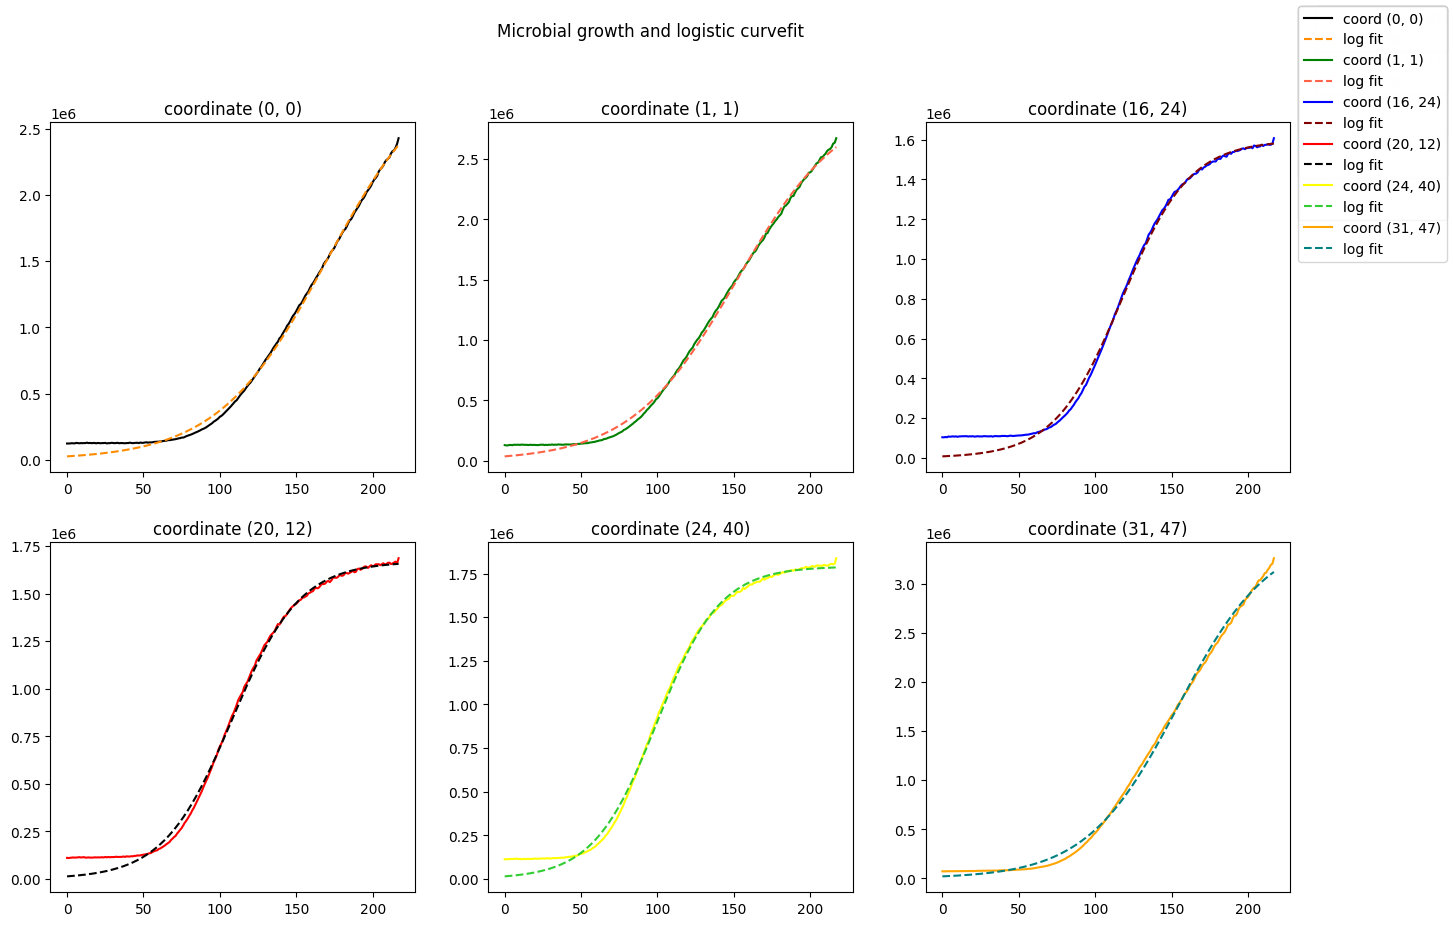

In [48]:
plot_location = 1
   
fig, axes = plt.subplots(2,3,figsize = (16, 10))
fig.suptitle('Microbial growth and logistic curvefit')
line_labels = []
colors = ['black','green','blue','red','yellow','orange']
colors2 = ['darkorange','tomato','maroon','black','limegreen','teal']
for c in coords:
    (L, k,t0), _ = curve_fit(
        f     = lm,   
        xdata = ts,
        ydata = Nt[0, c[0], c[1]],
        bounds= ((0, 0, 0), (np.inf,1,np.inf))
    )
    
    #list_fitted.append((L,k,t0)) 
    plt.subplot(2,3,plot_location)
    line_labels.append(f"coord {c}")
    line_labels.append("log fit ")
    p1 = plt.plot(ts,
                  Nt[0, c[0],c[1]],
                  color = colors[plot_location-1])
    
    plt.title(f"coordinate {c}")
    p2 = plt.plot(ts,
                  lm(ts,L,k,t0),
                  linestyle = 'dashed',
                  color =colors2[plot_location-1])
    plot_location+=1
    fig.legend([p1,p2],labels = line_labels)


#### Comment here on those upgraded fits

**Answer :** Now the fitted curves fit very very well the data, but not exactly especially from the beginning of the growth and at the very end. 

## 2c. The generalised logistic curve

The model used from now on is **Richards' curve**, which is :
$$
    N(t) = \beta + \frac{L_f}{(1 + \nu e^{-k(t-t_m)})^{1/\nu}}
$$

In [49]:
def richards(t, beta, l_f, nu, k, t_m):
    denom = 1 + nu * np.exp(-k * (t - t_m))
    return beta + l_f / np.power(denom, 1/nu)

### A 5-parametres failure

Do the fits as above, but this time using the `richards` function and setting the bounds $]0, \infty[$ for every parametre :

In [50]:
params = np.empty((len(coords), 5))

C:\Users\Heidi\AppData\Local\Temp\ipykernel_11668\2184696609.py:2: RuntimeWarning: overflow encountered in exp
  denom = 1 + nu * np.exp(-k * (t - t_m))
C:\Users\Heidi\AppData\Local\Temp\ipykernel_11668\2184696609.py:2: RuntimeWarning: overflow encountered in multiply
  denom = 1 + nu * np.exp(-k * (t - t_m))
C:\Users\Heidi\AppData\Local\Temp\ipykernel_11668\2748705395.py:30: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  fig.legend([p1,p2],labels = line_labels)


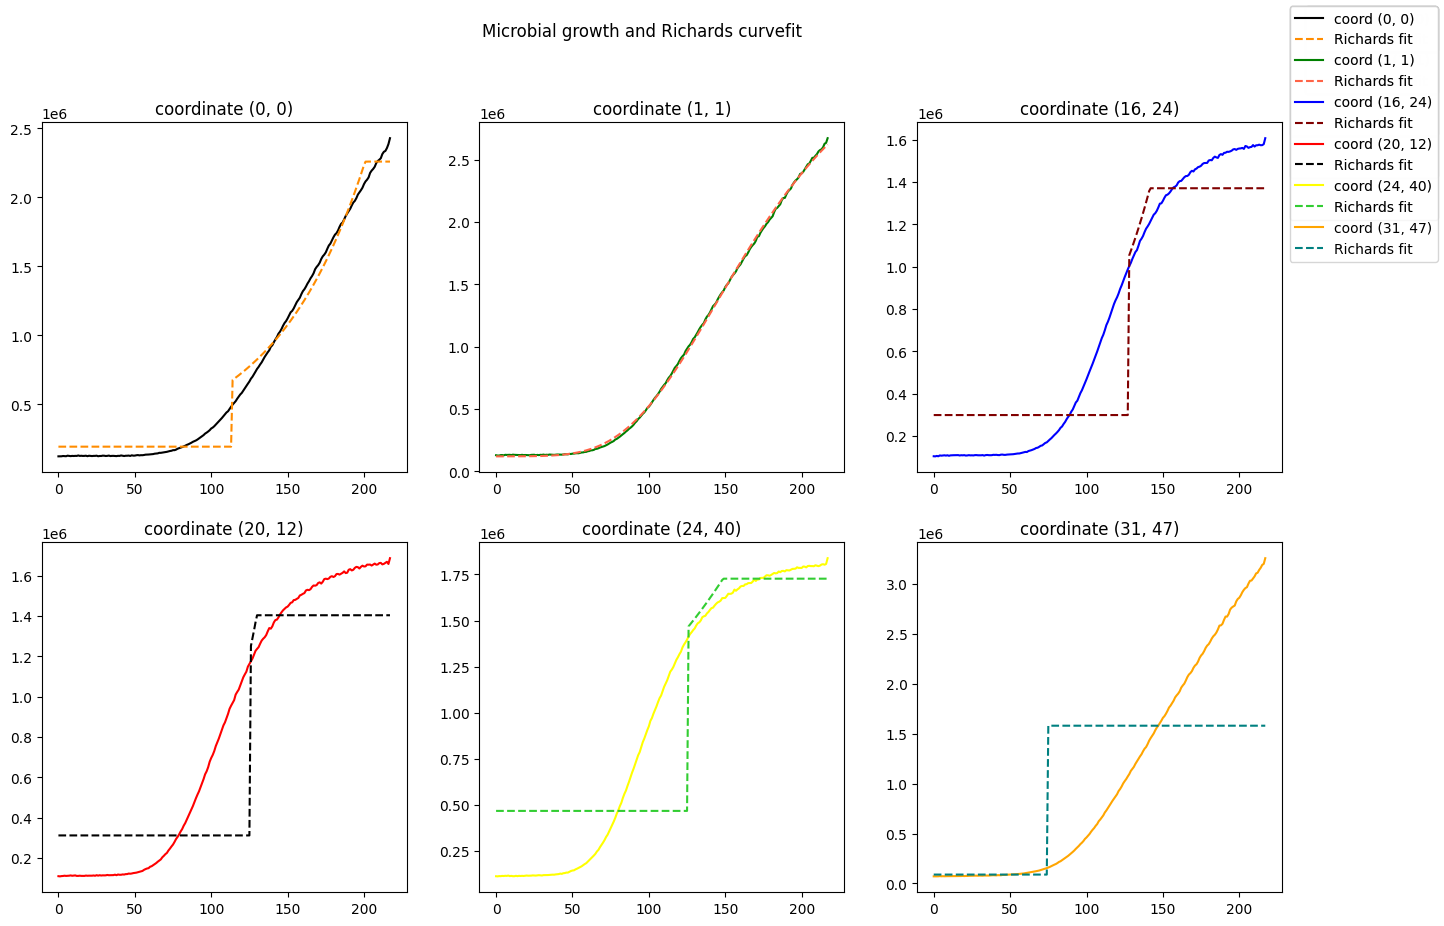

In [51]:
plot_location = 1
list_fitted = []   
fig, axes = plt.subplots(2,3,figsize = (16, 10))
fig.suptitle('Microbial growth and Richards curvefit')
line_labels = []
colors = ['black','green','blue','red','yellow','orange']
colors2 = ['darkorange','tomato','maroon','black','limegreen','teal']
for c in coords:
    (beta, l_f, nu, k, t_m), _ = curve_fit(
        f     = richards,   
        xdata = ts,
        ydata = Nt[0, c[0], c[1]],
        bounds= ((0, 0, 0, 0, 0), (np.inf,np.inf,np.inf,np.inf, np.inf))
    )
    
    list_fitted.append((beta, l_f, nu, k, t_m)) 
    plt.subplot(2,3,plot_location)
    line_labels.append(f"coord {c}")
    line_labels.append("Richards fit ")
    p1 = plt.plot(ts,
                  Nt[0, c[0],c[1]],
                  color = colors[plot_location-1])
    
    plt.title(f"coordinate {c}")
    p2 = plt.plot(ts,
                  richards(ts,beta, l_f, nu, k, t_m),
                  linestyle = 'dashed',
                  color =colors2[plot_location-1])
    plot_location+=1
    fig.legend([p1,p2],labels = line_labels)

Let's see how those values look like :

In [53]:
params = list_fitted
pd.DataFrame(
    data    = params,
    columns = ["beta", "Lf", "nu", "k", "tm"],
    index   = coords
)

beta            Lf            nu           k          tm
(0, 0)    192839.294344  2.066959e+06  4.887058e+02    8.180305  199.994792
(1, 1)    120319.225113  3.348275e+06  2.087761e-08    0.016959  144.213555
(16, 24)  298499.079489  1.072291e+06  2.028903e+03   52.638412  141.335537
(20, 12)  312344.668488  1.091079e+06  4.736142e+03  184.752379  129.794808
(24, 40)  467183.349239  1.259721e+06  3.088833e+03   31.491822  148.283377
(31, 47)   89113.415277  1.490980e+06  3.929790e+00  931.004991   74.202311

#### Comment here on what you suppose happened this time

**Answer :** There is too many parameters I guess ? There is great variance within ? 

### A 3-parametres variant

The parade for such a failure is to reduce the number of parametres to fit, but it requires us to have prior knowledge on their value. Fortunately, there are two parametres in the above model that we already know :
* $\beta$ : the number of cells at the start of the experiment
* $L_f$ : the difference between the numbers of cells at the start and end of the experiment

In this part, we will fit only the other three parametres. Find a way to make `curve_fit` vary only the last three parametres while keeping $\beta$ and $L_f$ to the above values (hint : try to understand the concept of _nested function_ and how the `lambda` keyword works) :

Set the first two columns of `params` to the right values for $\beta$ and $L_f$ (which you compute for each coordinate) :

Now adapt the code you wrote previously, so that it calls the `richards` function inside a _lambda_ function instead of directly, allowing you to fix the $\beta$ and $L_f$ parametres you computed by hand when calling the `richards` function :

In [81]:
params = np.empty((len(coords), 5))

In [82]:
params = np.empty((len(coords), 5))

for i, (r, c) in enumerate(coords):
    n0, nf = Nt[0, r , c].iloc[[0,-1]]
    
    params[i, 0] = n0
    params[i, 1] = nf - n0

In [83]:
pd.DataFrame(
    data    = params,
    columns = ["beta", "Lf", "nu", "k", "tm"],
    index   = coords
)


beta            Lf             nu              k  \
(0, 0)    122705.342189  2.306742e+06   1.028978e-03   1.678968e-02   
(1, 1)    129487.832351  2.544049e+06   8.337509e+01   1.311174e+04   
(16, 24)  103789.192494  1.503677e+06   2.359053e-01   4.029832e-02   
(20, 12)  110396.975545  1.575792e+06  1.063964e+224  3.960414e+246   
(24, 40)  112772.594997  1.725301e+06   1.547553e-75   3.376232e-57   
(31, 47)   71472.196121  3.186366e+06  7.501897e+247  1.144843e+243   

                     tm  
(0, 0)     1.611962e+02  
(1, 1)     9.170246e+00  
(16, 24)   1.128568e+02  
(20, 12)   1.163184e-28  
(24, 40)  1.018489e+248  
(31, 47)  2.599038e-144

In [84]:
params = np.empty((len(coords), 5))

for i, (r, c) in enumerate(coords):
    params[i, 2:] = curve_fit(
        f = lambda t, nu, k, t_m: richards(ts, params[i,0],params[i,1], nu, k, t_m),
        xdata = ts,
        ydata = Nt[0, r, c],
        bounds = (0,np.inf)
    )[0]


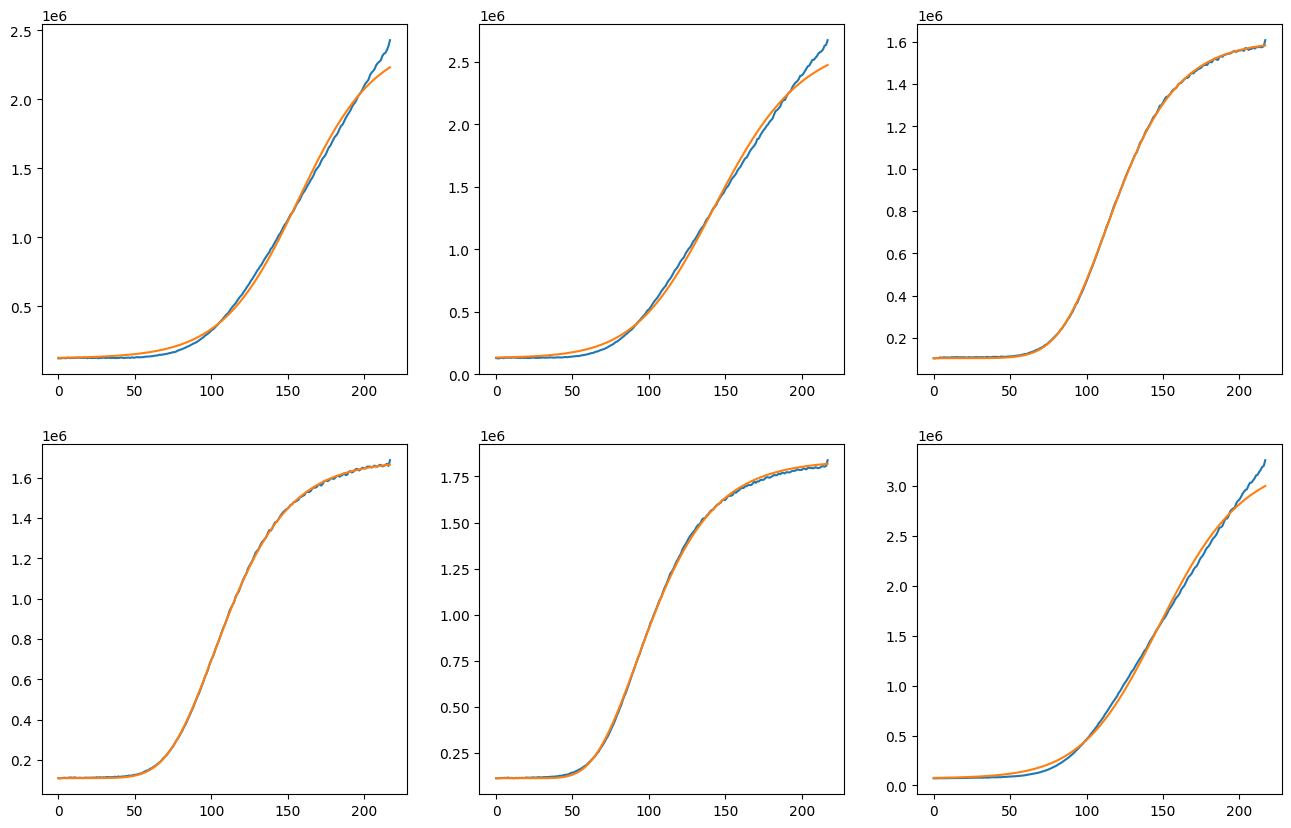

In [85]:
_, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16,10))
for i, (r, c) in enumerate(coords):
    axes[i//3, i%3].plot(Nt[0, r, c])
    axes[i//3, i%3].plot(richards(ts, *params[i]))
    #axes[i//3, i%3].plot(Nt[0, r, c])

**Hint 1 :** Your lambda function should take only the remaining parametres.

**Hint 2 :** You will have to find a way to store the values returned by `curve_fit` (less then 5) into the right locations in your `params` variable.

#### Comment here on what you observe

**Answer :** Now the fit is very similar to the observed data. Only 

### Back to 5 parametres

Fitting problems can become much easier if we can give some good **initial parametres** ; in the previous exercise, you fitted the last three parametres. This means that you now possess such initial parametres.

Repeat what you did, but this time by providing these initial parametres :

In [86]:
params3 = params.copy()
params  = np.empty((len(coords), 5))

In [87]:
for i, (r, c) in enumerate(coords):
    params[i] = curve_fit(
        f = lambda t, beta, l_f, nu, k, t_m: richards(ts, beta,l_f, nu, k, t_m),
        xdata = ts,
        ydata = Nt[0, r, c],
        p0 = params3[i],
        bounds = (0,np.inf)
    )[0]

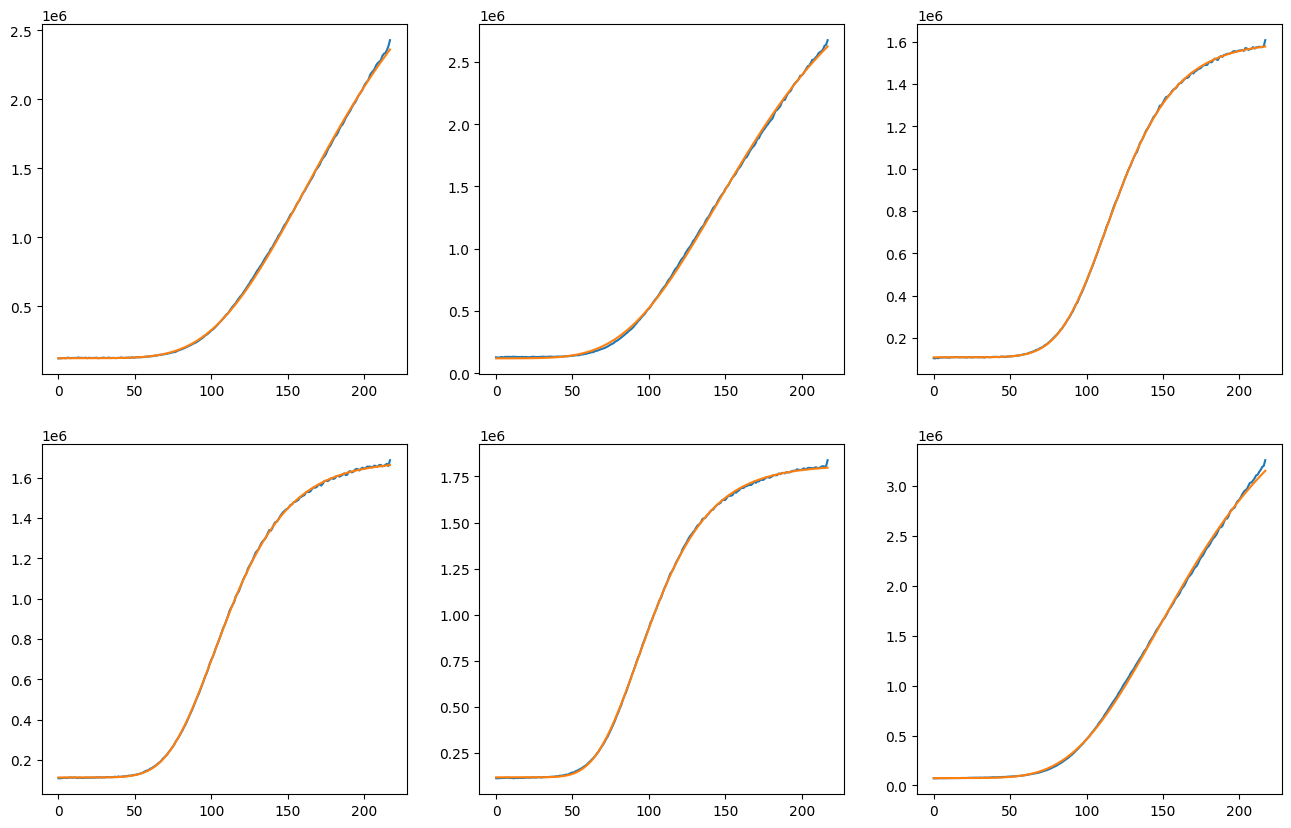

In [88]:
_, axes = plt.subplots(nrows = 2, ncols = 3, figsize = (16,10))
for i, (r, c) in enumerate(coords):
    axes[i//3, i%3].plot(Nt[0, r, c])
    axes[i//3, i%3].plot(richards(ts, *params[i]))
    #axes[i//3, i%3].plot(Nt[0, r, c])

**Hint :** There is a link to the documentation for `curve_fit` earlier in this exercise ; you may want to look at the `p0` part.

p0 array_like, optional
Initial guess for the parameters (length N).

If None, then the initial values will all be 1 (if
the number of parameters for the function can be determined using introspection, otherwise a ValueError is raised).
params3[0]
params3.shape[:,0]

In [89]:
params3.shape
params3[0]

array([1.22705342e+05, 2.30674160e+06, 9.75710988e-01, 3.95450866e-02,
       1.56942592e+02])

#### Comment here on why the last part fits better now

**Answer :** The algorithm now has initial values that we have calculated. Now the calculation is easier since we give some insight what we want to fit to the algorithm used here. 